<h2>Exploratory analysis of video ads in a video game</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('task_table_1.csv')
df2 = pd.read_csv('task_table_2.csv')

Checking if there are some undefined values in datasets:

In [2]:
pd.isnull(df1).sum(), pd.isnull(df2).sum()

(date                                           0
 season                                         0
 season_day                                     0
 global_user_id                                 0
 registration_date                              0
 cohort_day                                     0
 registration_country_name                      0
 registration_platform                          0
 last_session_country                         196
 last_session_platform                        196
 session_count_daily                            0
 playtime_daily                                 0
 training_count                                 0
 iap_transaction_count_daily                    0
 net_revenue_usd_iap_daily                      0
 is_payer_lifetime                              0
 first_transaction_date_iap                126479
 tokens_earned                                  0
 rest_boosters_earned                           0
 morale_boosters_earned                         0


Checking if there are duplicated data and dropping the duplicates:

In [3]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

There are 12 duplicated rows in task_table_1.csv and 0 duplicated rows in task_table_2.csv.

Dimensions of task_table_1.csv and task_table_2.csv:

In [4]:
df1.shape, df2.shape

((144826, 44), (823613, 5))

Plotting the correlation matrix of task_table_1.csv to see if there is linear relationship between two features(corr() method uses Pearson correlation coefficient - statistical measure of the linear relationship between two variables):

<AxesSubplot:>

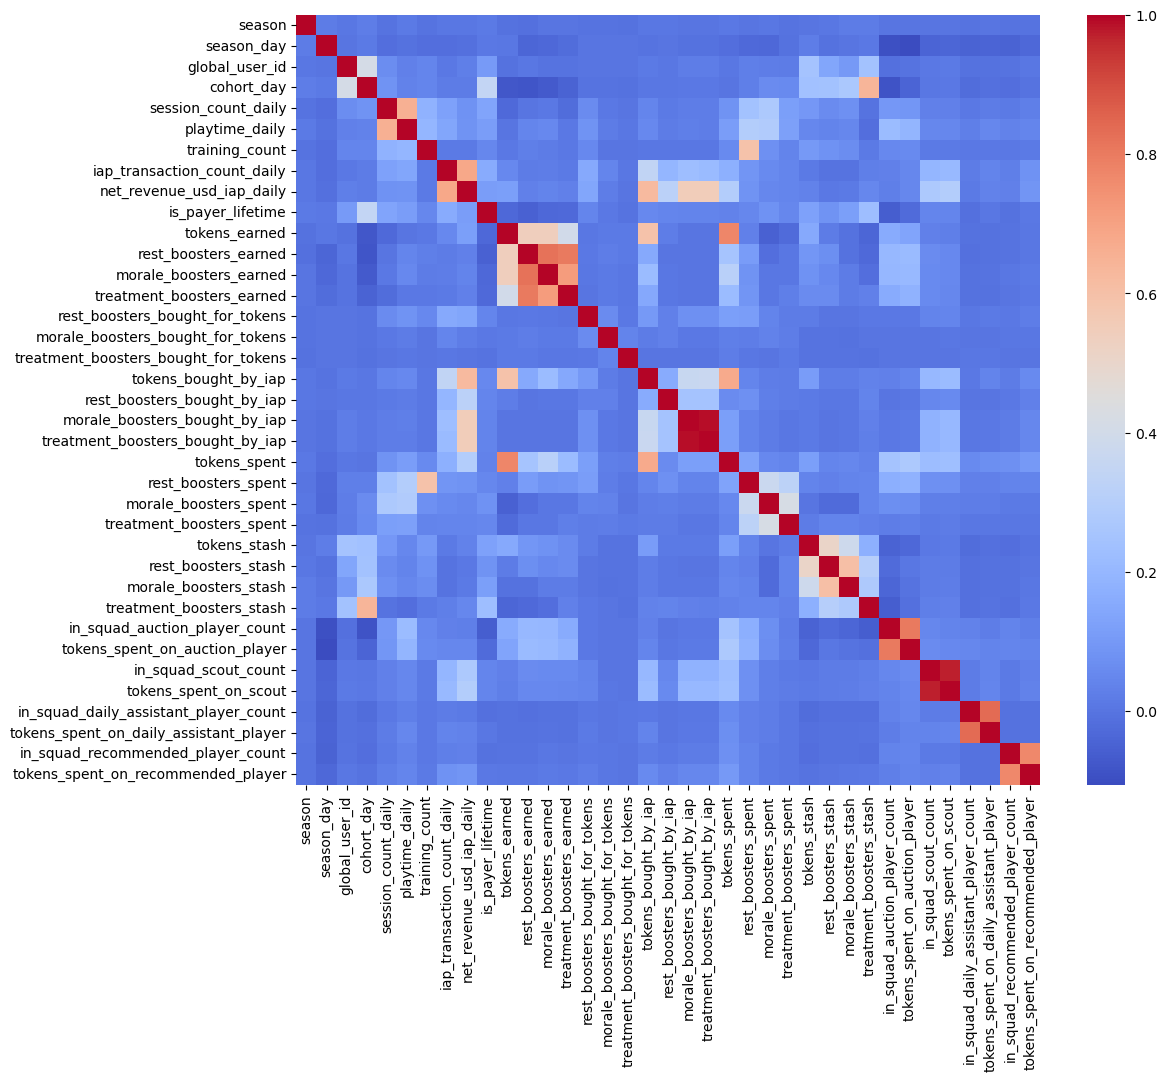

In [5]:
correlation_matrix_df1 = df1.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix_df1, cmap = "coolwarm", annot = False)

<h4>What can we see from the correlation matrix (which features have higher correlation)?</h4><br>
- playtime_daily up => session_count_daily up<br>
- cohort_day up => treatment_boosters_stash up<br>
- training_count up => rest_boosters_spent<br><br>
- iap_transaction_count_daily up => net_revenue_usd_iap_daily up<br>
- net_revenue_usd_iap_daily => tokens_bought_by_iap<br>
- net_revenue_usd_iap_daily => morale_booster_bought_by_iap<br>
- net_revenue_usd_iap_daily => treatment_booster_bought_by_iap<br><br>
- tokens_earned => tokens_bought_by_iap<br>
- tokens_earned => tokens_spent<br>
- tokens_earned => rest_boosters_earned<br>
- tokens_earned => morale_boosters_earned<br>
- rest_boosters_earned => morale_boosters_earned<br>
- rest_boosters_earned => treatment_boosters_earned<br>
- morale_boosters_earned => treatment_boosters_earned<br><br>
- tokens_bought_by_iap => tokens_spent<br>
- morale_boosters_bought_by_iap => treatment_boosters_bought_by_iap<br><br>
- rest_boosters_stash => morale_boosters_stash<br><br>
- in_squad_acution_player_count => tokens_spent_on_auction_player<br>
- in_squad_scout_count => tokens_spent_on_scout<br>
- in_squad_daily_assistant_player_count => tokens_spent_on_daily_assistant_player<br>
- in_squad_recommended_player_count => tokens_spent_on_recommended_player<br>

Analyzed data for a continuous period of 84 days, starting on January 1, 2023, and ending on March 25, 2023, encompassing a total of 2925 distinct managers who are watching video ads:

Stats for whole period for all ads:

In [6]:
net_revenue = df2['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from all video ads viewed between January 1, 2023, and March 25, 2023 is", net_revenue)
print("The average net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is", df2['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is", df2['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is", df2['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for all video ads is", df2.nunique().iloc[1])
print("The total count of possible reasons for watching a video ad is", df2.nunique().iloc[3])
print("Average earnings per manager for all ads is", net_revenue / df2.nunique().iloc[1])
print("Average number of ads watched per manager is", df2['net_revenue'].describe()[0] / df2.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from all video ads viewed between January 1, 2023, and March 25, 2023 is 687.1501382760001
The average net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is 0.0008343119138186553
The minimum net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single video ad viewed between January 1, 2023, and March 25, 2023 is 0.254211
The total number of managers participating in the analysis for all video ads is 2925
The total count of possible reasons for watching a video ad is 141
Average earnings per manager for all ads is 0.23492312419692313
Average number of ads watched per manager is 281.577094017094


All possible reasons for watching video ads and percentage how many of them were watched during the given period of time:

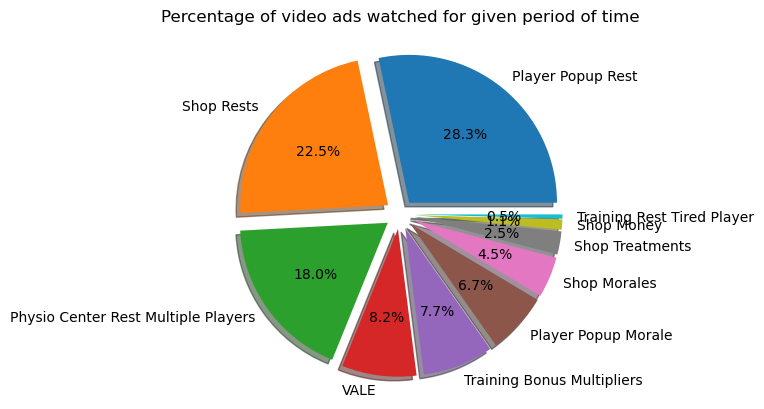

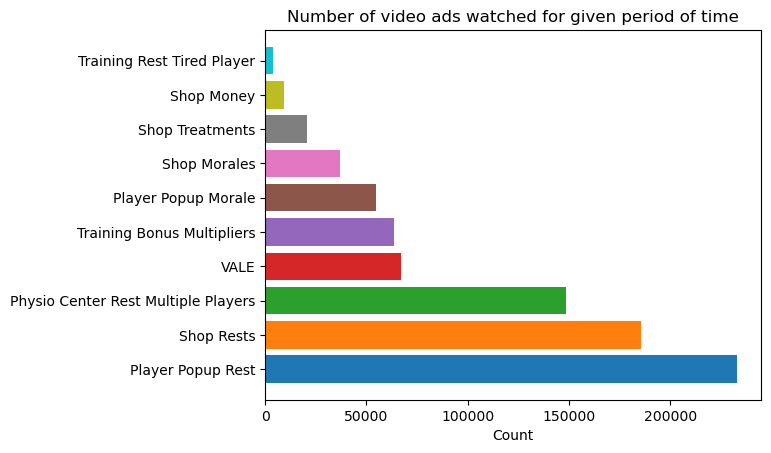

In [7]:
a = df2['reason'].value_counts()[0:9]
a['VALE'] = df2['reason'].value_counts()[9:].sum()
a = a.sort_values(ascending = False)

mylabels = list(a.index)
myexplode = [0.1] * 10

plt.pie(a, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of video ads watched for given period of time")
plt.show()

colors_big_pie = [
    (31/255, 119/255, 180/255),
    (255/255, 127/255, 14/255),
    (44/255, 160/255, 44/255),
    (214/255, 39/255, 40/255),
    (148/255, 103/255, 189/255),
    (140/255, 86/255, 75/255),
    (227/255, 119/255, 194/255),
    (127/255, 127/255, 127/255),
    (188/255, 189/255, 34/255),
    (23/255, 190/255, 207/255)
]

plt.barh(mylabels, a, color = colors_big_pie)
plt.xlabel("Count")
plt.title("Number of video ads watched for given period of time")
plt.show()

Let's see how many ads are regular ads and how many of them are VALE ads:

In [8]:
print("Total count of regular video ads is", df2['reason'].value_counts()[0:9].sum())
print("Total count of VALE video ads is", df2['reason'].value_counts().sum() - df2['reason'].value_counts()[0:9].sum())

Total count of regular video ads is 756452
Total count of VALE video ads is 67161


In [9]:
indexes_regular_ads = df2['reason'].value_counts()[0:9].index.tolist()

df2_regular_ads = df2.loc[df2['reason'].isin(indexes_regular_ads)]

Stats for whole period for regular ads:

In [10]:
net_revenue_regular_ads = df2_regular_ads['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed between January 1, 2023, and March 25, 2023 is", net_revenue_regular_ads)
print("The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is", df2_regular_ads['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is", df2_regular_ads['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is", df2_regular_ads['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for REGULAR ads is", df2_regular_ads.nunique().iloc[1])
print("The total count of possible reasons for watching a REGULAR video ad is", df2_regular_ads.nunique().iloc[3])
print("Average earnings per manager for REGULAR ads is", net_revenue_regular_ads / df2_regular_ads.nunique().iloc[1])
print("Average number of ads watched per manager for REGULAR ads is", df2_regular_ads['net_revenue'].describe()[0] / df2_regular_ads.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed between January 1, 2023, and March 25, 2023 is 621.4375182759999
The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is 0.0008215161282882646
The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed between January 1, 2023, and March 25, 2023 is 0.254211
The total number of managers participating in the analysis for REGULAR ads is 2650
The total count of possible reasons for watching a REGULAR video ad is 9
Average earnings per manager for REGULAR ads is 0.2345047238777358
Average number of ads watched per manager for REGULAR ads is 285.45358490566036


In [11]:
indexes_VALE_ads = df2['reason'].value_counts()[9:].index.tolist()

df2_VALE_ads = df2.loc[df2['reason'].isin(indexes_VALE_ads)]

Stats for whole period for VALE ads:

In [12]:
net_revenue_VALE_ads = df2_VALE_ads['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed between January 1, 2023, and March 25, 2023 is", net_revenue_VALE_ads)
print("The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is", df2_VALE_ads['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is", df2_VALE_ads['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is", df2_VALE_ads['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for VALE ads is", df2_VALE_ads.nunique().iloc[1])
print("The total count of possible reasons for watching a VALE video ad is", df2_VALE_ads.nunique().iloc[3])
print("Average earnings per manager for VALE ads is", net_revenue_VALE_ads / df2_VALE_ads.nunique().iloc[1])
print("Average number of ads watched per manager for VALE ads is", df2_VALE_ads['net_revenue'].describe()[0] / df2_VALE_ads.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed between January 1, 2023, and March 25, 2023 is 65.71262
The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is 0.0009784342103304029
The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed between January 1, 2023, and March 25, 2023 is 0.180285
The total number of managers participating in the analysis for VALE ads is 1892
The total count of possible reasons for watching a VALE video ad is 132
Average earnings per manager for VALE ads is 0.034731828752642704
Average number of ads watched per manager for VALE ads is 35.49735729386892


Although there are fewer watched VALE ads and that they generate less revenue, the average value of one VALE ad is 0.00097 $\$$, while the average value of a REGULAR ad is 0.00082 $\$$.

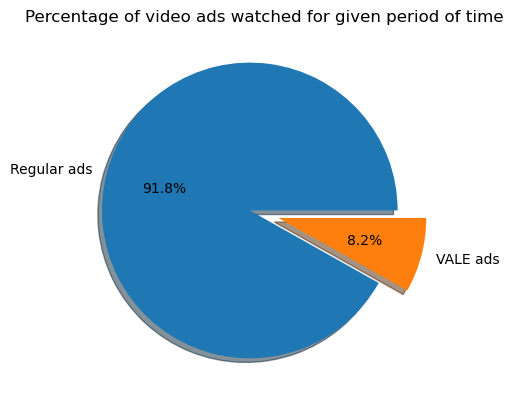

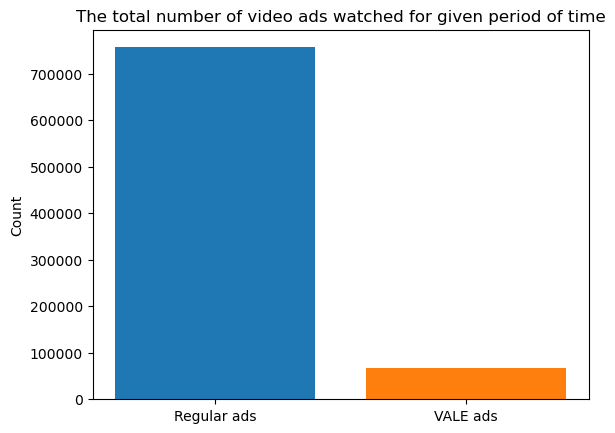

In [13]:
x_count = np.array([df2['reason'].value_counts()[0:9].sum(), df2['reason'].value_counts().sum() - df2['reason'].value_counts()[0:9].sum()])
labels_count = ["Regular ads", "VALE ads"]

myexplode = [0.1] * 2

plt.pie(x_count, labels = labels_count, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of video ads watched for given period of time")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labels_count, x_count, color = colors)
plt.ylabel("Count")
plt.title("The total number of video ads watched for given period of time")
plt.show()

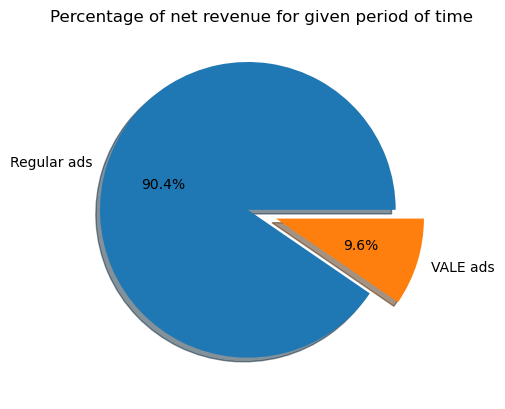

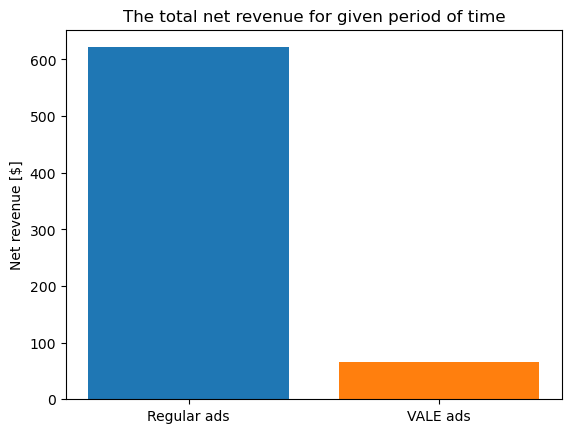

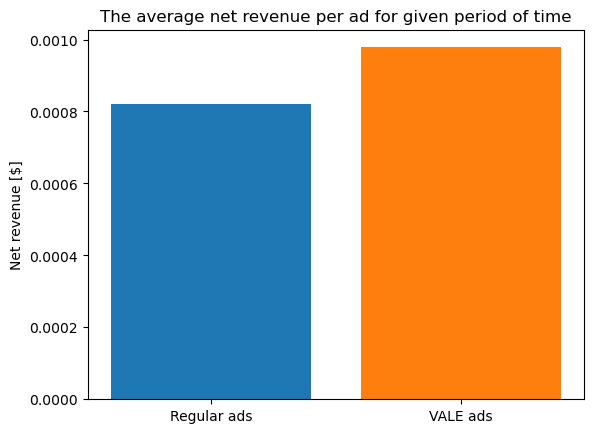

In [14]:
x_net_revenue = np.array([net_revenue_regular_ads, net_revenue_VALE_ads])
labels_net_revenue = ["Regular ads", "VALE ads"]

myexplode = [0.1] * 2

plt.pie(x_net_revenue, labels = labels_net_revenue, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of net revenue for given period of time")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labels_net_revenue, x_net_revenue, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue for given period of time")
plt.show()

x_net_revenue_per_ad_average = np.array([df2_regular_ads['net_revenue'].describe().iloc[1], df2_VALE_ads['net_revenue'].describe().iloc[1]])

plt.bar(labels_net_revenue, x_net_revenue_per_ad_average, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The average net revenue per ad for given period of time")
plt.show()

In [15]:
print("Total number of managers who are watching only REGULAR ads is", df2.nunique().iloc[1] - df2_VALE_ads.nunique().iloc[1])
print("Total number of managers who are watching only VALE ads is", df2.nunique().iloc[1] - df2_regular_ads.nunique().iloc[1])
print("Total number of managers who are watching only BOTH for VALE and REGULAR ads is", df2_regular_ads.nunique().iloc[1] - (df2.nunique().iloc[1] - df2_VALE_ads.nunique().iloc[1]))

Total number of managers who are watching only REGULAR ads is 1033
Total number of managers who are watching only VALE ads is 275
Total number of managers who are watching only BOTH for VALE and REGULAR ads is 1617


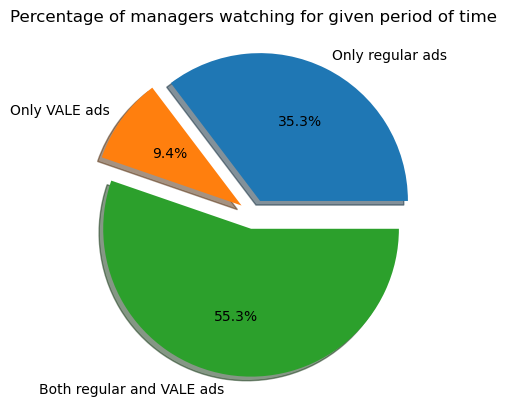

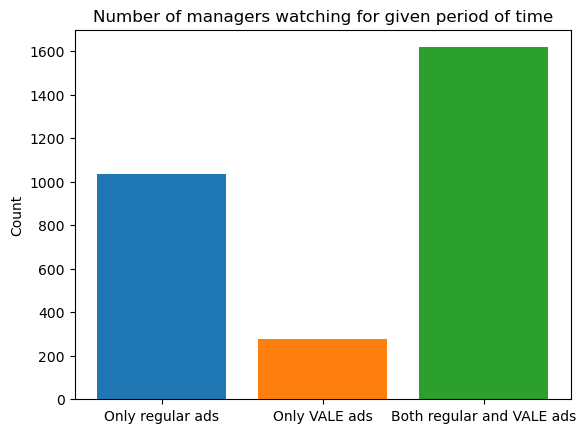

In [16]:
x_managers = np.array([df2.nunique().iloc[1] - df2_VALE_ads.nunique().iloc[1], df2.nunique().iloc[1] - df2_regular_ads.nunique().iloc[1], df2_regular_ads.nunique().iloc[1] - (df2.nunique().iloc[1] - df2_VALE_ads.nunique().iloc[1])])
labels_managers = ["Only regular ads", "Only VALE ads", "Both regular and VALE ads"]

myexplode = [0.1] * 3

plt.pie(x_managers, labels = labels_managers, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers watching for given period of time")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(labels_managers, x_managers, color = colors)
plt.ylabel("Count")
plt.title("Number of managers watching for given period of time")
plt.show()

In [17]:
id_regular_ad = df2_regular_ads['global_user_id'].unique()
id_VALE_ad = df2_VALE_ads['global_user_id'].unique()

Managers who are watching only regular/VALE ads:

In [18]:
unique_ids_in_regular = np.array(np.setdiff1d(id_regular_ad, id_VALE_ad))
unique_ids_in_VALE = np.array(np.setdiff1d(id_VALE_ad, id_regular_ad))

Managers who are watching BOTH regular and VALE ads:

In [19]:
unique_ids_in_both_regular_and_VALE = np.setdiff1d(df2['global_user_id'].unique(), np.union1d(unique_ids_in_regular, unique_ids_in_VALE))

<h1>Analysis per season</h1>

In [20]:
seasons = df1['season'].unique()

df1_seasons = []

for each_season in seasons: 
    season_data = df1[df1['season'] == each_season]
    
    df1_seasons.append(season_data)

df1_seasons_array = np.array(df1_seasons, dtype = object)

<h1>Season 166 analysis</h1>

In [21]:
net_revenue_iap_season1 = df1_seasons_array[0]['net_revenue_usd_iap_daily'].sum()

print("Total net revenue in season 166 from iap transactions is", net_revenue_iap_season1)

Total net revenue in season 166 from iap transactions is 1755.7799937001087


In [22]:
season1_start_date = df1_seasons_array[0]['date'].iloc[0]
season2_start_date = df1_seasons_array[1]['date'].iloc[0]
season3_start_date = df1_seasons_array[2]['date'].iloc[0]

df2_season1 = df2[df2['date'] < season2_start_date]
df2_season2 = df2[(df2['date'] >= season2_start_date) & (df2['date'] < season3_start_date)]
df2_season3 = df2[df2['date'] >= season3_start_date]

In [23]:
print("Total count of regular video ads is", df2_season1['reason'].value_counts()[0:9].sum())
print("Total count of VALE video ads is", df2_season1['reason'].value_counts().sum() - df2_season1['reason'].value_counts()[0:9].sum())

Total count of regular video ads is 257500
Total count of VALE video ads is 22916


In [24]:
indexes_regular_ads_season1 = df2_season1['reason'].value_counts()[0:9].index.tolist()
indexes_VALE_ads_season1 = df2_season1['reason'].value_counts()[9:].index.tolist()

df2_regular_ads_season1 = df2_season1.loc[df2['reason'].isin(indexes_regular_ads_season1)]
df2_VALE_ads_season1 = df2_season1.loc[df2_season1['reason'].isin(indexes_VALE_ads_season1)]

In [25]:
net_revenue_season1 = df2_season1['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from all video ads in season 166 is", net_revenue_season1)
print("The average net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is", df2_season1['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is", df2_season1['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is", df2_season1['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis in season 166 is", df2_season1.nunique().iloc[1])
print("The total count of possible reasons for watching a video ad in season 166 is", df2_season1.nunique().iloc[3])
print("Average earnings per manager in season 166 is", net_revenue_season1 / df2_season1.nunique().iloc[1])
print("Average number of ads watched per manager in season 166 is", df2_season1['net_revenue'].describe()[0] / df2_season1.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from all video ads in season 166 is 228.65431500000003
The average net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is 0.0008154110856726939
The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 166 is 0.180285
The total number of managers participating in the analysis in season 166 is 1795
The total count of possible reasons for watching a video ad in season 166 is 141
Average earnings per manager in season 166 is 0.12738401949860725
Average number of ads watched per manager in season 166 is 156.22061281337048


In [26]:
net_revenue_regular_ads_season1 = df2_regular_ads_season1['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 166 is", net_revenue_regular_ads_season1)
print("The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is", df2_regular_ads_season1['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is", df2_regular_ads_season1['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is", df2_regular_ads_season1['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for REGULAR ads in season 166 is", df2_regular_ads_season1.nunique().iloc[1])
print("The total count of possible reasons for watching a REGULAR video ad in season 166 is", df2_regular_ads_season1.nunique().iloc[3])
print("Average earnings per manager for REGULAR ads in season 166 is", net_revenue_regular_ads_season1 / df2_regular_ads_season1.nunique().iloc[1])
print("Average number of ads watched per manager for REGULAR ads in season 166 is", df2_regular_ads_season1['net_revenue'].describe()[0] / df2_regular_ads_season1.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 166 is 205.493445
The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is 0.00079803279611648
The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 166 is 0.064311
The total number of managers participating in the analysis for REGULAR ads in season 166 is 1618
The total count of possible reasons for watching a REGULAR video ad in season 166 is 9
Average earnings per manager for REGULAR ads in season 166 is 0.12700460135970335
Average number of ads watched per manager for REGULAR ads in season 166 is 159.14709517923362


In [27]:
net_revenue_VALE_ads_season1 = df2_VALE_ads_season1['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed in season 166 is", net_revenue_VALE_ads_season1)
print("The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is", df2_VALE_ads_season1['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is", df2_VALE_ads_season1['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is", df2_VALE_ads_season1['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for VALE ads in season 166 is", df2_VALE_ads_season1.nunique().iloc[1])
print("The total count of possible reasons for watching a VALE video ad in season 166 is", df2_VALE_ads_season1.nunique().iloc[3])
print("Average earnings per manager for VALE ads in season 166 is", net_revenue_VALE_ads_season1 / df2_VALE_ads_season1.nunique().iloc[1])
print("Average number of ads watched per manager for VALE ads in season 166 is", df2_VALE_ads_season1['net_revenue'].describe()[0] / df2_VALE_ads_season1.nunique().iloc[1])

The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed in season 166 is 23.160870000000003
The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is 0.0010106855472159187
The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 166 is 0.180285
The total number of managers participating in the analysis for VALE ads in season 166 is 1150
The total count of possible reasons for watching a VALE video ad in season 166 is 132
Average earnings per manager for VALE ads in season 166 is 0.020139886956521743
Average number of ads watched per manager for VALE ads in season 166 is 19.92695652173913


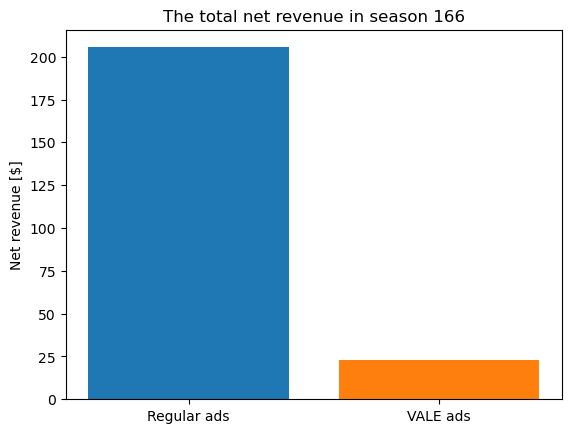

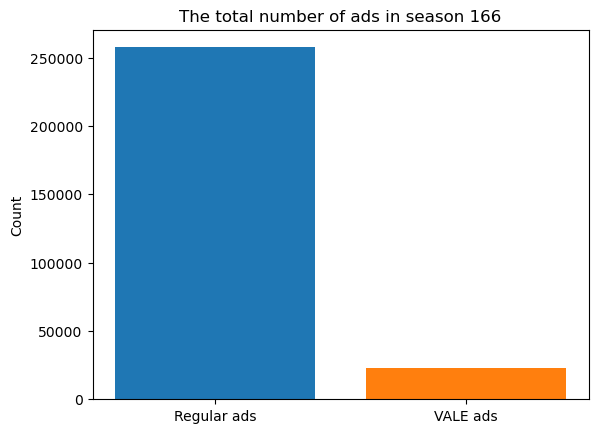

In [28]:
x_net_revenue_season1 = np.array([net_revenue_regular_ads_season1, net_revenue_VALE_ads_season1])

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labels_net_revenue, x_net_revenue_season1, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue in season 166")
plt.show()

x_count_season1 = np.array([df2_season1['reason'].value_counts()[0:9].sum(), df2_season1['reason'].value_counts().sum() - df2_season1['reason'].value_counts()[0:9].sum()])

plt.bar(labels_count, x_count_season1, color = colors)
plt.ylabel("Count")
plt.title("The total number of ads in season 166")
plt.show()

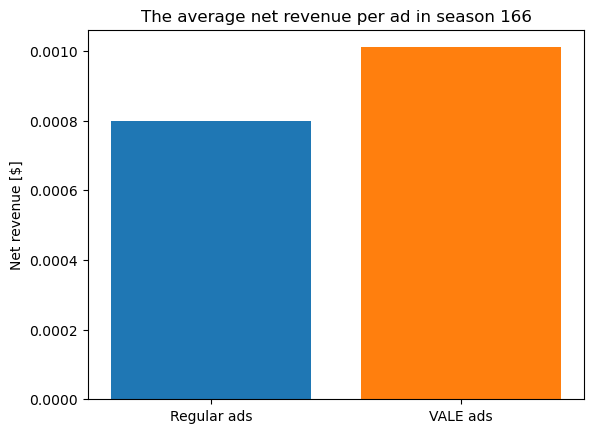

In [29]:
x_net_revenue_per_ad_average_season1 = np.array([df2_regular_ads_season1['net_revenue'].describe().iloc[1], df2_VALE_ads_season1['net_revenue'].describe().iloc[1]])

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labels_net_revenue, x_net_revenue_per_ad_average_season1, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The average net revenue per ad in season 166")
plt.show()

In [30]:
print("Total number of managers participating in the analysis ONLY for REGULAR ads in season 166 is", df2_season1.nunique().iloc[1] - df2_VALE_ads_season1.nunique().iloc[1])
print("Total number of managers participating in the analysis ONLY for VALE ads in season 166 is", df2_season1.nunique().iloc[1] - df2_regular_ads_season1.nunique().iloc[1])
print("Total number of managers participating in the analysis BOTH for VALE and REGULAR ads in season 166 is", df2_regular_ads_season1.nunique().iloc[1] - (df2_season1.nunique().iloc[1] - df2_VALE_ads_season1.nunique().iloc[1]))

Total number of managers participating in the analysis ONLY for REGULAR ads in season 166 is 645
Total number of managers participating in the analysis ONLY for VALE ads in season 166 is 177
Total number of managers participating in the analysis BOTH for VALE and REGULAR ads in season 166 is 973


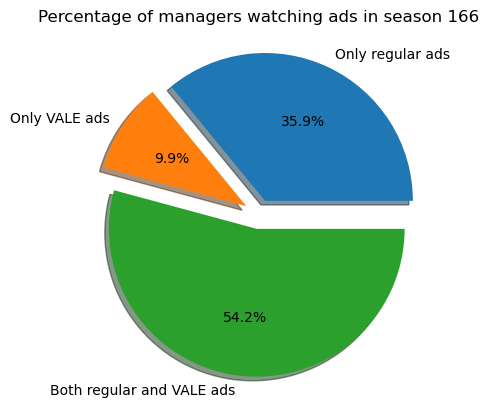

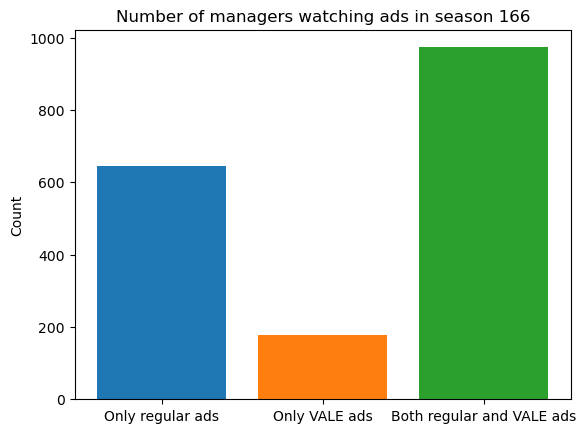

In [31]:
x_managers_season1 = np.array([df2_season1.nunique().iloc[1] - df2_VALE_ads_season1.nunique().iloc[1], df2_season1.nunique().iloc[1] - df2_regular_ads_season1.nunique().iloc[1], df2_regular_ads_season1.nunique().iloc[1] - (df2_season1.nunique().iloc[1] - df2_VALE_ads_season1.nunique().iloc[1])])

myexplode = [0.1] * 3

plt.pie(x_managers_season1, labels = labels_managers, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers watching ads in season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(labels_managers, x_managers_season1, color = colors)
plt.ylabel("Count")
plt.title("Number of managers watching ads in season 166")
plt.show()

In [32]:
id_regular_ad_season1 = df2_regular_ads_season1['global_user_id'].unique()
id_VALE_ad_season1 = df2_VALE_ads_season1['global_user_id'].unique()

unique_ids_in_regular_season1 = np.array(np.setdiff1d(id_regular_ad_season1, id_VALE_ad_season1))
unique_ids_in_VALE_season1 = np.array(np.setdiff1d(id_VALE_ad_season1, id_regular_ad_season1))
unique_ids_in_both_regular_and_VALE_season1 = np.setdiff1d(df2_season1['global_user_id'].unique(), np.union1d(unique_ids_in_regular_season1, unique_ids_in_VALE_season1))

<h1>Season 167 analysis</h1>

Total net revenue in season 167 from iap transactions is 1663.2877011017245 

Total count of regular video ads is 252444
Total count of VALE video ads is 22152 

The total net revenue, in dollars, earned by Nordeus from all video ads in season 167 is 231.39076127600006
The average net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is 0.0008426588926131259
The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is 0.254211
The total number of managers participating in the analysis in season 167 is 1719
The total count of possible reasons for watching a video ad in season 167 is 141
Average earnings per manager in season 167 is 0.1346077727027342
Average number of ads watched per manager in season 167 is 159.74171029668412 

The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 167 is 2

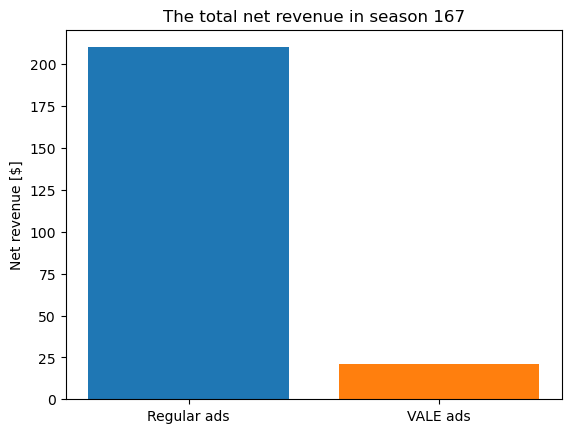

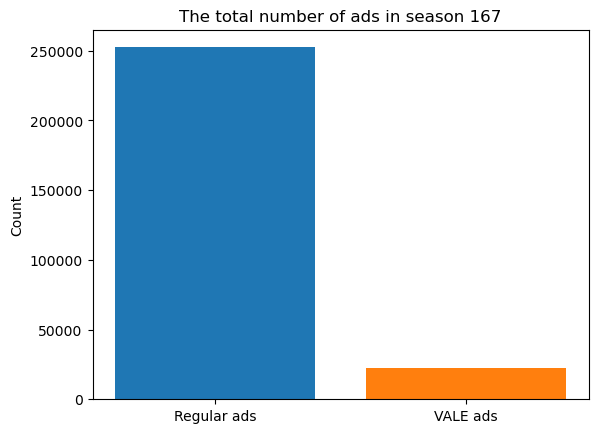

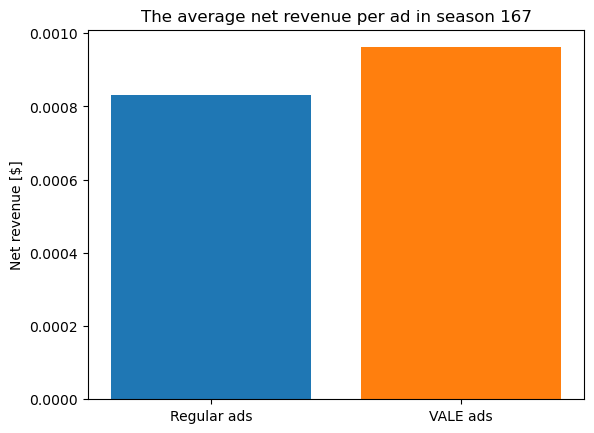

Total count of managers participating in the analysis ONLY for REGULAR ads in season 167 is 650
Total count of managers participating in the analysis ONLY for VALE ads in season 167 is 150
Total count of managers participating in the analysis BOTH for VALE and REGULAR ads in season 167 is 919 



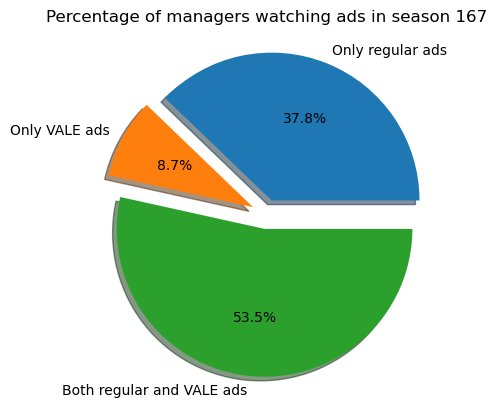

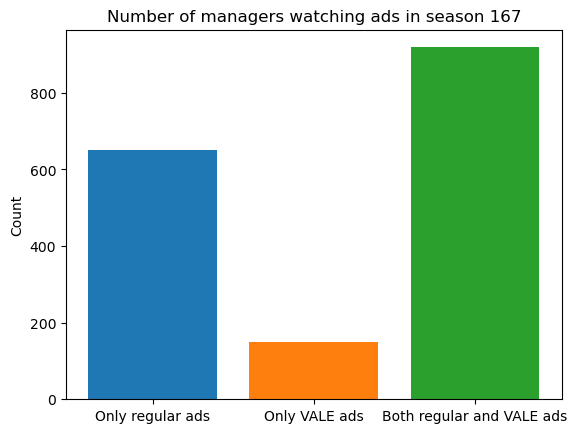

In [33]:
net_revenue_iap_season2 = df1_seasons_array[1]['net_revenue_usd_iap_daily'].sum()

print("Total net revenue in season 167 from iap transactions is", net_revenue_iap_season2, "\n")

print("Total count of regular video ads is", df2_season2['reason'].value_counts()[0:9].sum())
print("Total count of VALE video ads is", df2_season2['reason'].value_counts().sum() - df2_season2['reason'].value_counts()[0:9].sum(), "\n")

net_revenue_season2 = df2_season2['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from all video ads in season 167 is", net_revenue_season2)
print("The average net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is", df2_season2['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is", df2_season2['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 167 is", df2_season2['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis in season 167 is", df2_season2.nunique().iloc[1])
print("The total count of possible reasons for watching a video ad in season 167 is", df2_season2.nunique().iloc[3])
print("Average earnings per manager in season 167 is", net_revenue_season2 / df2_season2.nunique().iloc[1])
print("Average number of ads watched per manager in season 167 is", df2_season2['net_revenue'].describe()[0] / df2_season2.nunique().iloc[1], "\n")


indexes_regular_ads_season2 = df2_season2['reason'].value_counts()[0:9].index.tolist()
indexes_VALE_ads_season2 = df2_season2['reason'].value_counts()[9:].index.tolist()

df2_regular_ads_season2 = df2_season2.loc[df2['reason'].isin(indexes_regular_ads_season2)]
df2_VALE_ads_season2 = df2_season2.loc[df2_season2['reason'].isin(indexes_VALE_ads_season2)]


net_revenue_regular_ads_season2 = df2_regular_ads_season2['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 167 is", net_revenue_regular_ads_season2)
print("The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 167 is", df2_regular_ads_season2['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 167 is", df2_regular_ads_season2['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 167 is", df2_regular_ads_season2['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for REGULAR ads in season 167 is", df2_regular_ads_season2.nunique().iloc[1])
print("The total count of possible reasons for watching a REGULAR video ad in season 167 is", df2_regular_ads_season2.nunique().iloc[3])
print("Average earnings per manager for REGULAR ads in season 167 is", net_revenue_regular_ads_season2 / df2_regular_ads_season2.nunique().iloc[1])
print("Average number of ads watched per manager for REGULAR ads in season 167 is", df2_regular_ads_season2['net_revenue'].describe()[0] / df2_regular_ads_season2.nunique().iloc[1], "\n")


net_revenue_VALE_ads_season2 = df2_VALE_ads_season2['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed in season 167 is", net_revenue_VALE_ads_season2)
print("The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 167 is", df2_VALE_ads_season2['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 167 is", df2_VALE_ads_season2['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 167 is", df2_VALE_ads_season2['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for VALE ads in season 167 is", df2_VALE_ads_season2.nunique().iloc[1])
print("The total count of possible reasons for watching a VALE video ad in season 167 is", df2_VALE_ads_season2.nunique().iloc[3])
print("Average earnings per manager for VALE ads in season 167 is", net_revenue_VALE_ads_season2 / df2_VALE_ads_season2.nunique().iloc[1])
print("Average number of ads watched per manager for VALE ads in season 167 is", df2_VALE_ads_season2['net_revenue'].describe()[0] / df2_VALE_ads_season2.nunique().iloc[1])


x_count_season2 = np.array([df2_season2['reason'].value_counts()[0:9].sum(), df2_season2['reason'].value_counts().sum() - df2_season2['reason'].value_counts()[0:9].sum()])

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

x_net_revenue_season2 = np.array([net_revenue_regular_ads_season2, net_revenue_VALE_ads_season2])

plt.bar(labels_net_revenue, x_net_revenue_season2, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue in season 167")
plt.show()


plt.bar(labels_count, x_count_season2, color = colors)
plt.ylabel("Count")
plt.title("The total number of ads in season 167")
plt.show()


x_net_revenue_per_ad_average_season2 = np.array([df2_regular_ads_season2['net_revenue'].describe().iloc[1], df2_VALE_ads_season2['net_revenue'].describe().iloc[1]])

plt.bar(labels_net_revenue, x_net_revenue_per_ad_average_season2, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The average net revenue per ad in season 167")
plt.show()


print("Total count of managers participating in the analysis ONLY for REGULAR ads in season 167 is", df2_season2.nunique().iloc[1] - df2_VALE_ads_season2.nunique().iloc[1])
print("Total count of managers participating in the analysis ONLY for VALE ads in season 167 is", df2_season2.nunique().iloc[1] - df2_regular_ads_season2.nunique().iloc[1])
print("Total count of managers participating in the analysis BOTH for VALE and REGULAR ads in season 167 is", df2_regular_ads_season2.nunique().iloc[1] - (df2_season2.nunique().iloc[1] - df2_VALE_ads_season2.nunique().iloc[1]), "\n")


x_managers_season2 = np.array([df2_season2.nunique().iloc[1] - df2_VALE_ads_season2.nunique().iloc[1], df2_season2.nunique().iloc[1] - df2_regular_ads_season2.nunique().iloc[1], df2_regular_ads_season2.nunique().iloc[1] - (df2_season2.nunique().iloc[1] - df2_VALE_ads_season2.nunique().iloc[1])])

myexplode = [0.1] * 3

plt.pie(x_managers_season2, labels = labels_managers, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers watching ads in season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(labels_managers, x_managers_season2, color = colors)
plt.ylabel("Count")
plt.title("Number of managers watching ads in season 167")
plt.show()


id_regular_ad_season2 = df2_regular_ads_season2['global_user_id'].unique()
id_VALE_ad_season2 = df2_VALE_ads_season2['global_user_id'].unique()
unique_ids_in_regular_season2 = np.array(np.setdiff1d(id_regular_ad_season2, id_VALE_ad_season2))
unique_ids_in_VALE_season2 = np.array(np.setdiff1d(id_VALE_ad_season2, id_regular_ad_season2))
unique_ids_in_both_regular_and_VALE_season2 = np.setdiff1d(df2_season2['global_user_id'].unique(), np.union1d(unique_ids_in_regular_season2, unique_ids_in_VALE_season2))

<h1>Season 168 analysis</h1>

Total net revenue in season 168 from iap transactions is 2126.5211230357036 

Total count of regular video ads is 246508
Total count of VALE video ads is 22093 

The total net revenue, in dollars, earned by Nordeus from all video ads in season 168 is 227.10506199999998
The average net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is 0.000845510858112934
The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is 5e-06
The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is 0.190522
The total number of managers participating in the analysis in season 168 is 1677
The total count of possible reasons for watching a video ad in season 168 is 141
Average earnings per manager in season 168 is 0.13542341204531902
Average number of ads watched per manager in season 168 is 160.1675611210495 

The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 168 is 20

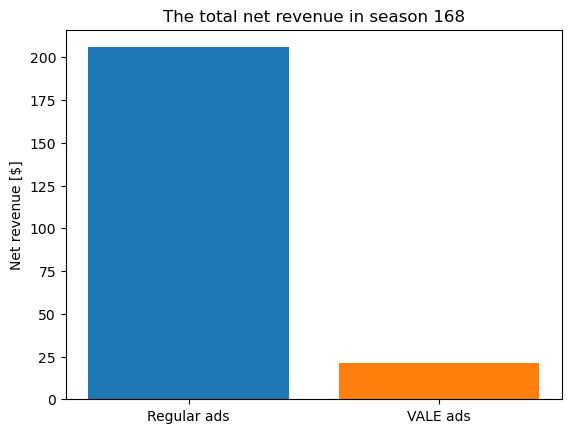

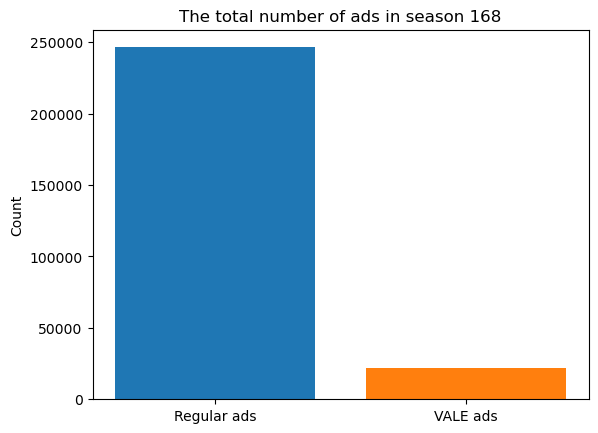

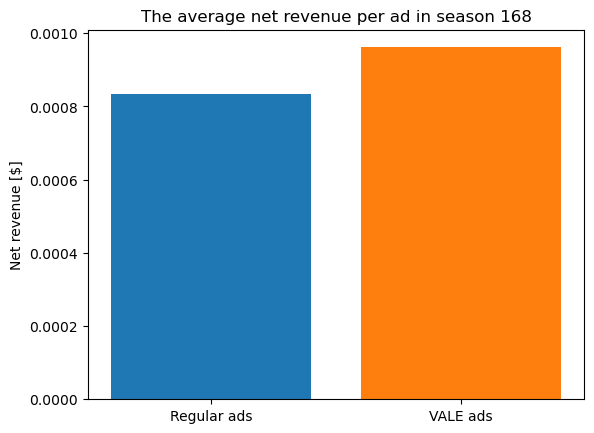

Total count of managers participating in the analysis ONLY for REGULAR ads in season 168 is 650
Total count of managers participating in the analysis ONLY for VALE ads in season 168 is 141
Total count of managers participating in the analysis BOTH for VALE and REGULAR ads in season 168 is 886 



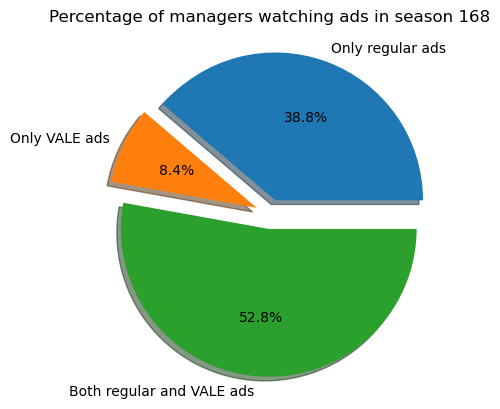

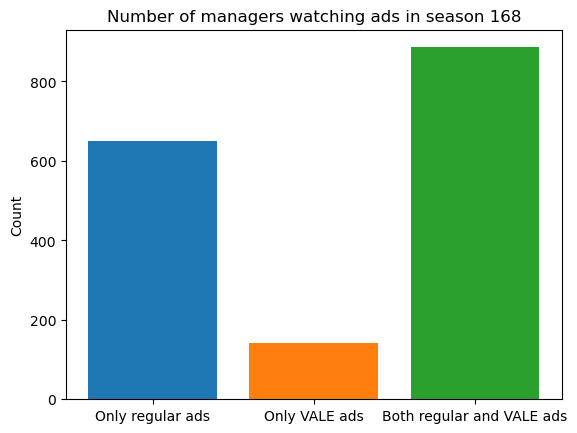

In [34]:
net_revenue_iap_season3 = df1_seasons_array[2]['net_revenue_usd_iap_daily'].sum()

print("Total net revenue in season 168 from iap transactions is", net_revenue_iap_season3, "\n")

print("Total count of regular video ads is", df2_season3['reason'].value_counts()[0:9].sum())
print("Total count of VALE video ads is", df2_season3['reason'].value_counts().sum() - df2_season3['reason'].value_counts()[0:9].sum(), "\n")

net_revenue_season3 = df2_season3['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from all video ads in season 168 is", net_revenue_season3)
print("The average net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is", df2_season3['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is", df2_season3['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single video ad in season 168 is", df2_season3['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis in season 168 is", df2_season3.nunique().iloc[1])
print("The total count of possible reasons for watching a video ad in season 168 is", df2_season3.nunique().iloc[3])
print("Average earnings per manager in season 168 is", net_revenue_season3 / df2_season3.nunique().iloc[1])
print("Average number of ads watched per manager in season 168 is", df2_season3['net_revenue'].describe()[0] / df2_season3.nunique().iloc[1], "\n")


indexes_regular_ads_season3 = df2_season3['reason'].value_counts()[0:9].index.tolist()
indexes_VALE_ads_season3 = df2_season3['reason'].value_counts()[9:].index.tolist()

df2_regular_ads_season3 = df2_season3.loc[df2['reason'].isin(indexes_regular_ads_season3)]
df2_VALE_ads_season3 = df2_season3.loc[df2_season3['reason'].isin(indexes_VALE_ads_season3)]


net_revenue_regular_ads_season3 = df2_regular_ads_season3['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from REGULAR video ads viewed in season 168 is", net_revenue_regular_ads_season3)
print("The average net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 168 is", df2_regular_ads_season3['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 168 is", df2_regular_ads_season3['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single REGULAR video ad viewed in season 168 is", df2_regular_ads_season3['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for REGULAR ads in season 168 is", df2_regular_ads_season3.nunique().iloc[1])
print("The total count of possible reasons for watching a REGULAR video ad in season 168 is", df2_regular_ads_season3.nunique().iloc[3])
print("Average earnings per manager for REGULAR ads in season 168 is", net_revenue_regular_ads_season3 / df2_regular_ads_season3.nunique().iloc[1])
print("Average number of ads watched per manager for REGULAR ads in season 168 is", df2_regular_ads_season3['net_revenue'].describe()[0] / df2_regular_ads_season3.nunique().iloc[1], "\n")


net_revenue_VALE_ads_season3 = df2_VALE_ads_season3['net_revenue'].sum()

print("The total net revenue, in dollars, earned by Nordeus from VALE video ads viewed in season 168 is", net_revenue_VALE_ads_season3)
print("The average net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 168 is", df2_VALE_ads_season3['net_revenue'].describe().iloc[1])
print("The minimum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 168 is", df2_VALE_ads_season3['net_revenue'].describe().iloc[3])
print("The maximum net revenue, in dollars, earned by Nordeus from a single VALE video ad viewed in season 168 is", df2_VALE_ads_season3['net_revenue'].describe().iloc[7])
print("The total number of managers participating in the analysis for VALE ads in season 168 is", df2_VALE_ads_season3.nunique().iloc[1])
print("The total count of possible reasons for watching a VALE video ad in season 168 is", df2_VALE_ads_season3.nunique().iloc[3])
print("Average earnings per manager for VALE ads in season 168 is", net_revenue_VALE_ads_season3 / df2_VALE_ads_season3.nunique().iloc[1])
print("Average number of ads watched per manager for VALE ads in season 168 is", df2_VALE_ads_season3['net_revenue'].describe()[0] / df2_VALE_ads_season3.nunique().iloc[1])


x_count_season3 = np.array([df2_season3['reason'].value_counts()[0:9].sum(), df2_season3['reason'].value_counts().sum() - df2_season3['reason'].value_counts()[0:9].sum()])

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

x_net_revenue_season3 = np.array([net_revenue_regular_ads_season3, net_revenue_VALE_ads_season3])

plt.bar(labels_net_revenue, x_net_revenue_season3, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue in season 168")
plt.show()


plt.bar(labels_count, x_count_season3, color = colors)
plt.ylabel("Count")
plt.title("The total number of ads in season 168")
plt.show()


x_net_revenue_per_ad_average_season3 = np.array([df2_regular_ads_season3['net_revenue'].describe().iloc[1], df2_VALE_ads_season3['net_revenue'].describe().iloc[1]])

plt.bar(labels_net_revenue, x_net_revenue_per_ad_average_season3, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("The average net revenue per ad in season 168")
plt.show()


print("Total count of managers participating in the analysis ONLY for REGULAR ads in season 168 is", df2_season3.nunique().iloc[1] - df2_VALE_ads_season3.nunique().iloc[1])
print("Total count of managers participating in the analysis ONLY for VALE ads in season 168 is", df2_season3.nunique().iloc[1] - df2_regular_ads_season3.nunique().iloc[1])
print("Total count of managers participating in the analysis BOTH for VALE and REGULAR ads in season 168 is", df2_regular_ads_season3.nunique().iloc[1] - (df2_season3.nunique().iloc[1] - df2_VALE_ads_season3.nunique().iloc[1]), "\n")


x_managers_season3 = np.array([df2_season3.nunique().iloc[1] - df2_VALE_ads_season3.nunique().iloc[1], df2_season3.nunique().iloc[1] - df2_regular_ads_season3.nunique().iloc[1], df2_regular_ads_season3.nunique().iloc[1] - (df2_season3.nunique().iloc[1] - df2_VALE_ads_season3.nunique().iloc[1])])

myexplode = [0.1] * 3

plt.pie(x_managers_season3, labels = labels_managers, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers watching ads in season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(labels_managers, x_managers_season3, color = colors)
plt.ylabel("Count")
plt.title("Number of managers watching ads in season 168")
plt.show()


id_regular_ad_season3 = df2_regular_ads_season3['global_user_id'].unique()
id_VALE_ad_season3 = df2_VALE_ads_season3['global_user_id'].unique()
unique_ids_in_regular_season3 = np.array(np.setdiff1d(id_regular_ad_season3, id_VALE_ad_season3))
unique_ids_in_VALE_season3 = np.array(np.setdiff1d(id_VALE_ad_season3, id_regular_ad_season3))
unique_ids_in_both_regular_and_VALE_season3 = np.setdiff1d(df2_season3['global_user_id'].unique(), np.union1d(unique_ids_in_regular_season3, unique_ids_in_VALE_season3))

<h1>Overall analysis for all seasons</h1>

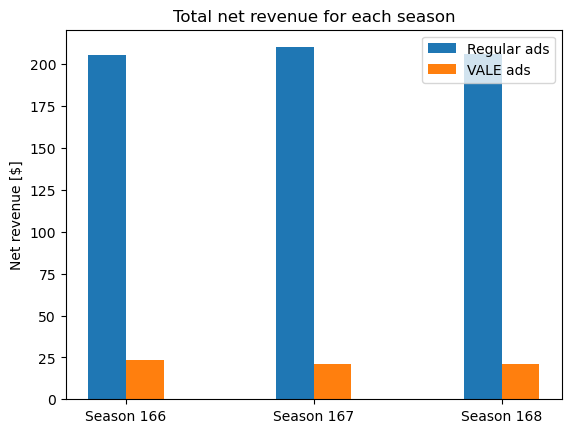

In [35]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [x_net_revenue_season1[0], x_net_revenue_season2[0], x_net_revenue_season3[0]]
Y2 = [x_net_revenue_season1[1], x_net_revenue_season2[1], x_net_revenue_season3[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, Y1, label = 'Regular ads', width = 0.2)
plt.bar(X_axis + 0.1, Y2, label = 'VALE ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Net revenue [$]")
plt.title("Total net revenue for each season")
plt.legend()
plt.show()

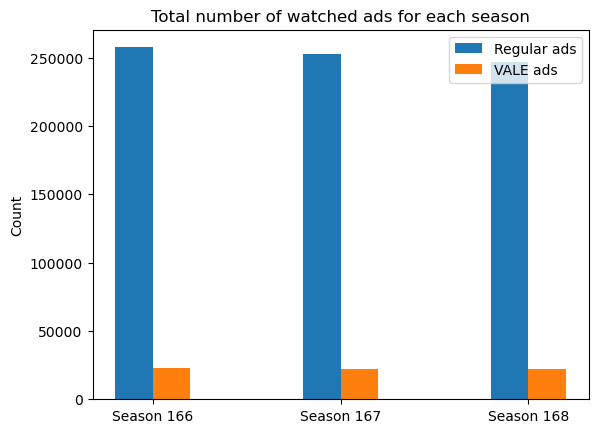

In [36]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [x_count_season1[0], x_count_season2[0], x_count_season3[0]]
Y2 = [x_count_season1[1], x_count_season2[1], x_count_season3[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, Y1, label = 'Regular ads', width = 0.2)
plt.bar(X_axis + 0.1, Y2, label = 'VALE ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Total number of watched ads for each season")
plt.legend()
plt.show()

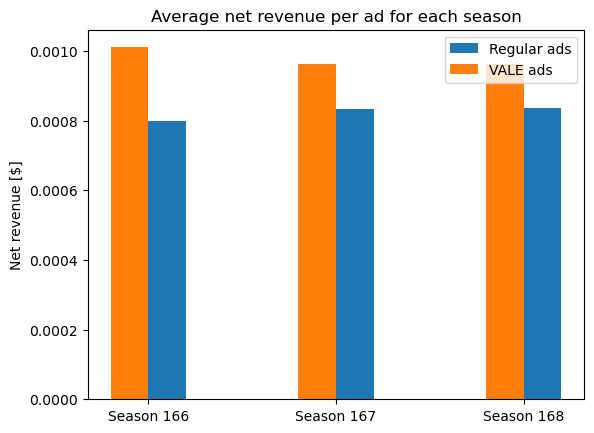

In [37]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [x_net_revenue_per_ad_average_season1[0], x_net_revenue_per_ad_average_season2[0], x_net_revenue_per_ad_average_season3[0]]
Y2 = [x_net_revenue_per_ad_average_season1[1], x_net_revenue_per_ad_average_season2[1], x_net_revenue_per_ad_average_season3[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.1, Y1, label = 'Regular ads', width = 0.2)
plt.bar(X_axis - 0.1, Y2, label = 'VALE ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Net revenue [$]")
plt.title("Average net revenue per ad for each season")
plt.legend()
plt.show()

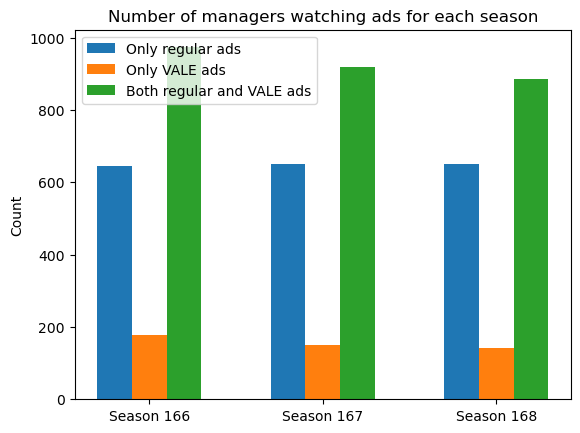

In [38]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [x_managers_season1[0], x_managers_season2[0], x_managers_season3[0]]
Y2 = [x_managers_season1[1], x_managers_season2[1], x_managers_season3[1]]
Y3 = [x_managers_season1[2], x_managers_season2[2], x_managers_season3[2]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y1, label = 'Only regular ads', width = 0.2)
plt.bar(X_axis , Y2, label = 'Only VALE ads', width = 0.2)
plt.bar(X_axis + 0.2, Y3, label = 'Both regular and VALE ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Number of managers watching ads for each season")
plt.legend()
plt.show()

In [39]:
x_num_of_regular_ads_season = np.array([df2_regular_ads_season1['reason'].value_counts()[0:9].sum(),
                                        df2_regular_ads_season2['reason'].value_counts()[0:9].sum(),
                                        df2_regular_ads_season3['reason'].value_counts()[0:9].sum()])

x_num_of_VALE_ads_season = np.array([df2_VALE_ads_season1['reason'].value_counts()[9:].sum(),
                                        df2_VALE_ads_season2['reason'].value_counts()[9:].sum(),
                                        df2_VALE_ads_season3['reason'].value_counts()[9:].sum()])


x_net_revenue_regular_ads_seasons = np.array([net_revenue_regular_ads_season1, net_revenue_regular_ads_season2, net_revenue_regular_ads_season3])
x_net_revenue_VALE_ads_seasons = np.array([net_revenue_VALE_ads_season1, net_revenue_VALE_ads_season2, net_revenue_VALE_ads_season3])

<h1>Overall analysis for all seasons per day</h1>

In [40]:
season_length = 28

season1_dates = df2_season1['date'].unique()
season2_dates = df2_season2['date'].unique()
season3_dates = df2_season3['date'].unique()

net_revenue_per_day_season1_regular_ads = np.empty((0, season_length), float)
net_revenue_per_day_season2_regular_ads = np.empty((0, season_length), float)
net_revenue_per_day_season3_regular_ads = np.empty((0, season_length), float)

num_of_watched_per_day_season1_regular_ads = np.empty((0, season_length), float)
num_of_watched_per_day_season2_regular_ads = np.empty((0, season_length), float)
num_of_watched_per_day_season3_regular_ads = np.empty((0, season_length), float)


net_revenue_per_day_season1_VALE_ads = np.empty((0, season_length), float)
net_revenue_per_day_season2_VALE_ads = np.empty((0, season_length), float)
net_revenue_per_day_season3_VALE_ads = np.empty((0, season_length), float)

num_of_watched_per_day_season1_VALE_ads = np.empty((0, season_length), float)
num_of_watched_per_day_season2_VALE_ads = np.empty((0, season_length), float)
num_of_watched_per_day_season3_VALE_ads = np.empty((0, season_length), float)


for i in season1_dates:
    date_x = df2_season1[(df2_season1['date'] == i) & (df2_season1['reason'].isin(indexes_regular_ads_season1))]
    
    num_regular = df2_season1['date'][(df2_season1['date'] == i) & (df2_season1['reason'].isin(indexes_regular_ads_season1))].count()
    net_revenue_x = date_x['net_revenue'].sum()
    
    num_of_watched_per_day_season1_regular_ads = np.append(num_of_watched_per_day_season1_regular_ads, np.array(num_regular))
    net_revenue_per_day_season1_regular_ads = np.append(net_revenue_per_day_season1_regular_ads, np.array(net_revenue_x))

    #######################

    date_xx = df2_season1[(df2_season1['date'] == i) & (df2_season1['reason'].isin(indexes_VALE_ads_season1))]
    
    num_VALE = df2_season1['date'][(df2_season1['date'] == i) & (df2_season1['reason'].isin(indexes_VALE_ads_season1))].count()
    net_revenue_xx = date_xx['net_revenue'].sum()
    
    num_of_watched_per_day_season1_VALE_ads = np.append(num_of_watched_per_day_season1_VALE_ads, np.array(num_VALE))   
    net_revenue_per_day_season1_VALE_ads = np.append(net_revenue_per_day_season1_VALE_ads, np.array(net_revenue_xx))
    
x_season = np.arange(1, season_length + 1)


for i in season2_dates:
    date_x = df2_season2[(df2_season2['date'] == i) & (df2_season2['reason'].isin(indexes_regular_ads_season2))]
    
    num_regular = df2_season2['date'][(df2_season2['date'] == i) & (df2_season2['reason'].isin(indexes_regular_ads_season1))].count()
    net_revenue_x = date_x['net_revenue'].sum()
    
    num_of_watched_per_day_season2_regular_ads = np.append(num_of_watched_per_day_season2_regular_ads, np.array(num_regular))
    net_revenue_per_day_season2_regular_ads = np.append(net_revenue_per_day_season2_regular_ads, np.array(net_revenue_x))

    #######################

    date_xx = df2_season2[(df2_season2['date'] == i) & (df2_season2['reason'].isin(indexes_VALE_ads_season2))]
    
    num_VALE = df2_season2['date'][(df2_season2['date'] == i) & (df2_season2['reason'].isin(indexes_VALE_ads_season2))].count()
    net_revenue_xx = date_xx['net_revenue'].sum()
    
    num_of_watched_per_day_season2_VALE_ads = np.append(num_of_watched_per_day_season2_VALE_ads, np.array(num_VALE))
    net_revenue_per_day_season2_VALE_ads = np.append(net_revenue_per_day_season2_VALE_ads, np.array(net_revenue_xx))
    

for i in season3_dates:
    date_x = df2_season3[(df2_season3['date'] == i) & (df2_season3['reason'].isin(indexes_regular_ads_season3))]
    
    num_regular = df2_season3['date'][(df2_season3['date'] == i) & (df2_season3['reason'].isin(indexes_regular_ads_season3))].count()
    net_revenue_x = date_x['net_revenue'].sum()
    
    num_of_watched_per_day_season3_regular_ads = np.append(num_of_watched_per_day_season3_regular_ads, np.array(num_regular))
    net_revenue_per_day_season3_regular_ads = np.append(net_revenue_per_day_season3_regular_ads, np.array(net_revenue_x))

    #######################

    date_xx = df2_season3[(df2_season3['date'] == i) & (df2_season3['reason'].isin(indexes_VALE_ads_season3))]
    
    num_VALE = df2_season3['date'][(df2_season3['date'] == i) & (df2_season3['reason'].isin(indexes_VALE_ads_season3))].count()
    net_revenue_xx = date_xx['net_revenue'].sum()
    
    num_of_watched_per_day_season3_VALE_ads = np.append(num_of_watched_per_day_season3_VALE_ads, np.array(num_VALE))
    net_revenue_per_day_season3_VALE_ads = np.append(net_revenue_per_day_season3_VALE_ads, np.array(net_revenue_xx))


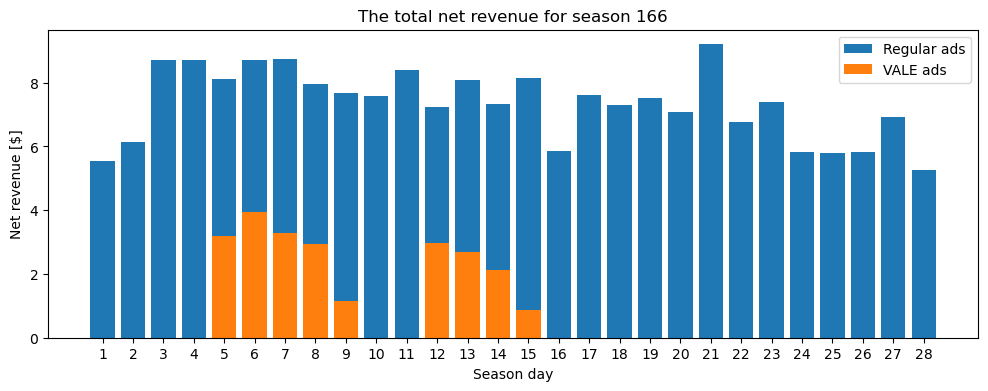

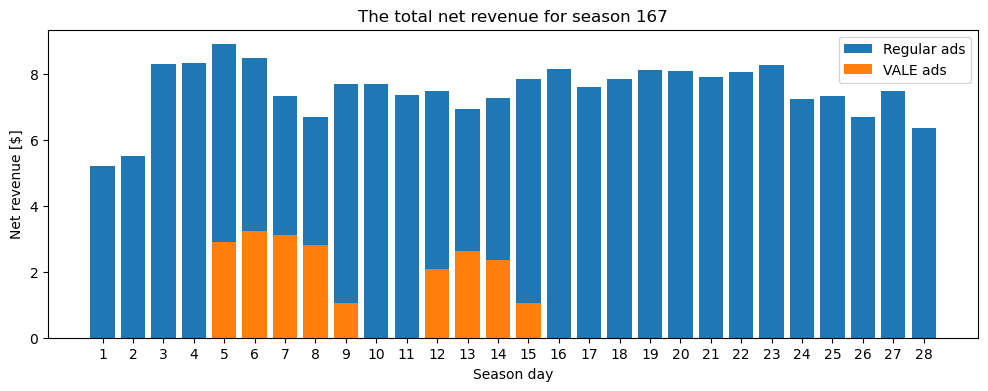

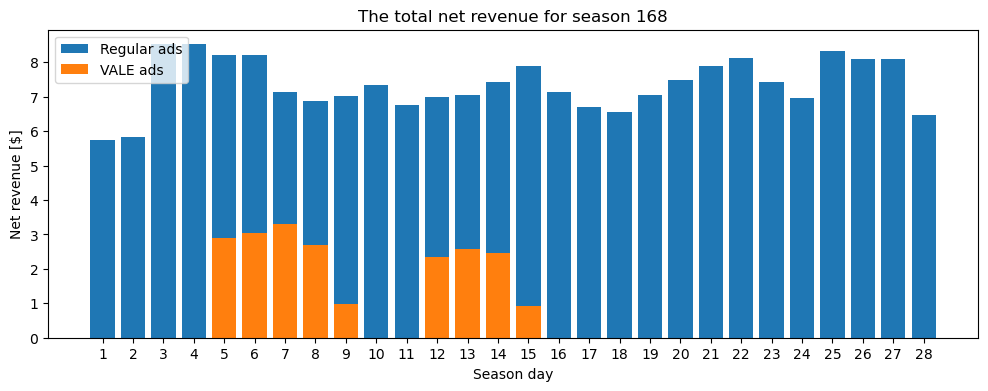

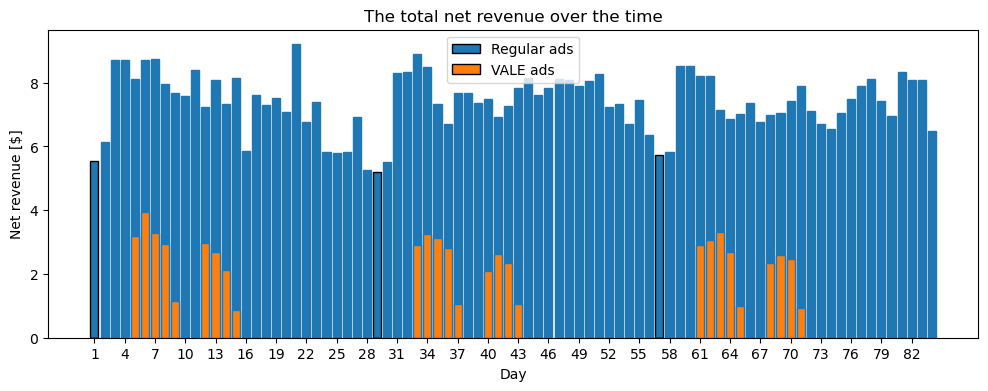

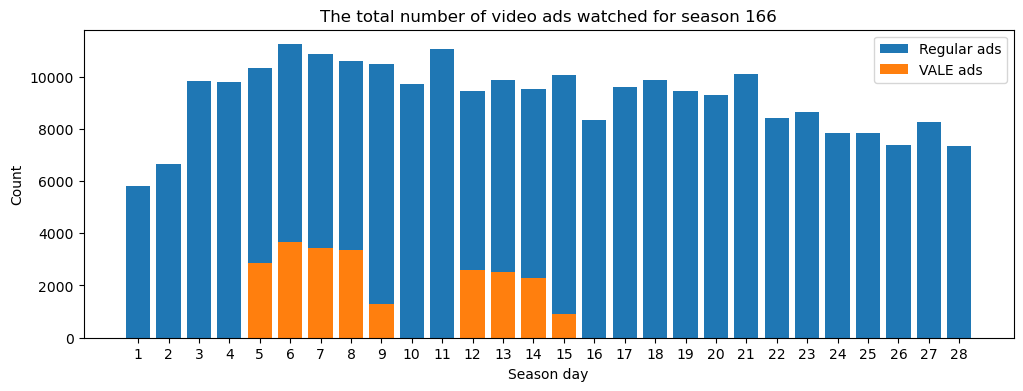

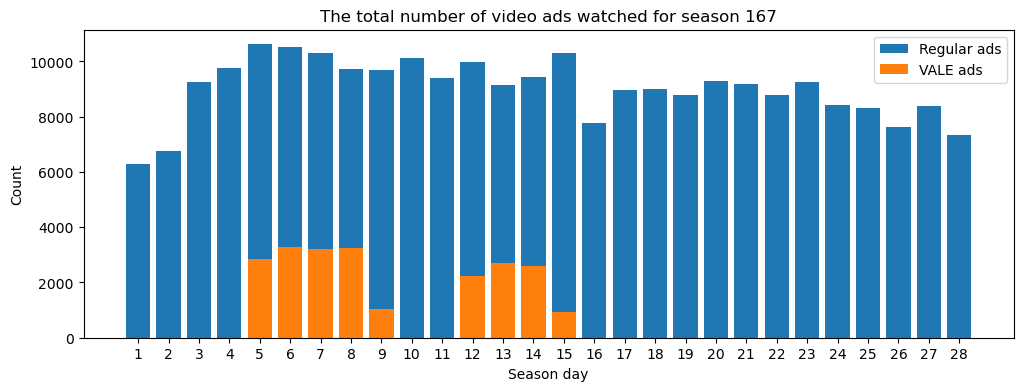

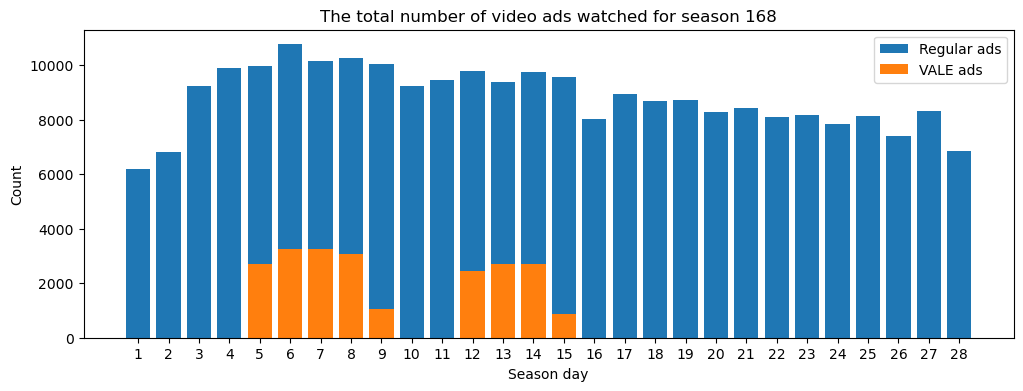

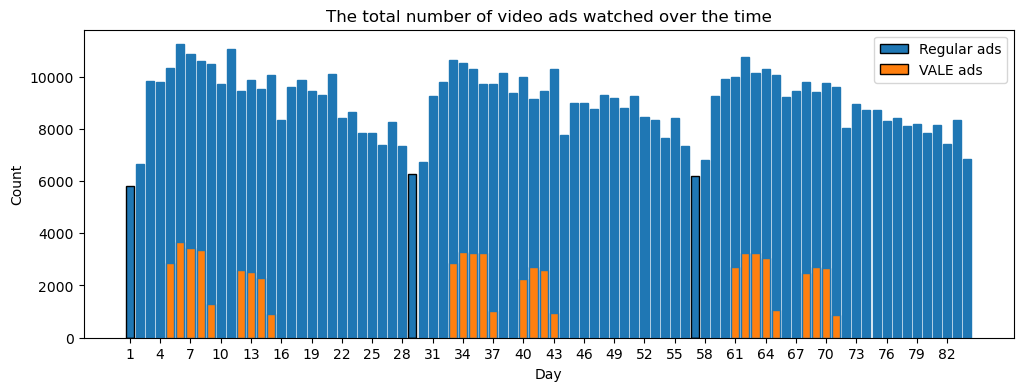

In [41]:
net_revenue_per_day_regular_ads_seasons = np.array([net_revenue_per_day_season1_regular_ads, net_revenue_per_day_season2_regular_ads, net_revenue_per_day_season3_regular_ads])
net_revenue_per_day_VALE_ads_seasons = np.array([net_revenue_per_day_season1_VALE_ads, net_revenue_per_day_season2_VALE_ads, net_revenue_per_day_season3_VALE_ads])

# Plot for net revenue #

season_array = np.arange(1, 29)

plt.figure(figsize=(12, 4))
plt.bar(season_array, net_revenue_per_day_regular_ads_seasons[0],  label='Regular ads')
plt.bar(season_array, net_revenue_per_day_VALE_ads_seasons[0], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue for season 166")

plt.legend()
plt.show()


plt.figure(figsize=(12, 4))
plt.bar(season_array, net_revenue_per_day_regular_ads_seasons[1],  label='Regular ads')
plt.bar(season_array, net_revenue_per_day_VALE_ads_seasons[1], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue for season 167")

plt.legend()
plt.show()


plt.figure(figsize=(12, 4))
plt.bar(season_array, net_revenue_per_day_regular_ads_seasons[2],  label='Regular ads')
plt.bar(season_array, net_revenue_per_day_VALE_ads_seasons[2], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue for season 168")

plt.legend()
plt.show()


net_revenue_per_day_regular_ads_over_time_seasons = np.concatenate((net_revenue_per_day_season1_regular_ads, net_revenue_per_day_season2_regular_ads, net_revenue_per_day_season3_regular_ads))
net_revenue_per_day_VALE_ads_over_time_seasons = np.concatenate((net_revenue_per_day_season1_VALE_ads, net_revenue_per_day_season2_VALE_ads, net_revenue_per_day_season3_VALE_ads))
x_over_time_seasons = np.arange(1, 3 * season_length + 1)

edge_colors = ['black' if i in [0, 28, 56] else '#1f77b4' for i in range(len(x_over_time_seasons))]

plt.figure(figsize=(12, 4))
plt.bar(x_over_time_seasons, net_revenue_per_day_regular_ads_over_time_seasons,  label='Regular ads', edgecolor = edge_colors)
plt.bar(x_over_time_seasons, net_revenue_per_day_VALE_ads_over_time_seasons, label='VALE ads', edgecolor = edge_colors)
plt.xticks(x_over_time_seasons[0::3])

plt.xlabel("Day")
plt.ylabel("Net revenue [$]")
plt.title("The total net revenue over the time")

plt.legend()
plt.show()


# Plot for number of ads watched #

num_of_watched_per_day_regular_ads_seasons = np.array([num_of_watched_per_day_season1_regular_ads, num_of_watched_per_day_season2_regular_ads, num_of_watched_per_day_season3_regular_ads])
num_of_watched_per_day_VALE_ads_seasons = np.array([num_of_watched_per_day_season1_VALE_ads, num_of_watched_per_day_season2_VALE_ads, num_of_watched_per_day_season3_VALE_ads])


season_array = np.arange(1, 29)

plt.figure(figsize=(12, 4))
plt.bar(season_array, num_of_watched_per_day_regular_ads_seasons[0],  label='Regular ads')
plt.bar(season_array, num_of_watched_per_day_VALE_ads_seasons[0], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Count")
plt.title("The total number of video ads watched for season 166")

plt.legend()
plt.show()


plt.figure(figsize=(12, 4))
plt.bar(season_array, num_of_watched_per_day_regular_ads_seasons[1],  label='Regular ads')
plt.bar(season_array, num_of_watched_per_day_VALE_ads_seasons[1], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Count")
plt.title("The total number of video ads watched for season 167")

plt.legend()
plt.show()


plt.figure(figsize=(12, 4))
plt.bar(season_array, num_of_watched_per_day_regular_ads_seasons[2],  label='Regular ads')
plt.bar(season_array, num_of_watched_per_day_VALE_ads_seasons[2], label='VALE ads')
plt.xticks(season_array);

plt.xlabel("Season day")
plt.ylabel("Count")
plt.title("The total number of video ads watched for season 168")

plt.legend()
plt.show()


num_of_watched_per_day_regular_ads_over_time_seasons = np.concatenate((num_of_watched_per_day_season1_regular_ads, num_of_watched_per_day_season2_regular_ads, num_of_watched_per_day_season3_regular_ads))
num_of_watched_per_day_VALE_ads_over_time_seasons = np.concatenate((num_of_watched_per_day_season1_VALE_ads, num_of_watched_per_day_season2_VALE_ads, num_of_watched_per_day_season3_VALE_ads))
x_over_time_seasons = np.arange(1, 3 * season_length + 1)

edge_colors = ['black' if i in [0, 28, 56] else '#1f77b4' for i in range(len(x_over_time_seasons))]

plt.figure(figsize=(12, 4))
plt.bar(x_over_time_seasons, num_of_watched_per_day_regular_ads_over_time_seasons,  label='Regular ads', edgecolor = edge_colors)
plt.bar(x_over_time_seasons, num_of_watched_per_day_VALE_ads_over_time_seasons, label='VALE ads', edgecolor = edge_colors)
plt.xticks(x_over_time_seasons[0::3])

plt.xlabel("Day")
plt.ylabel("Count")
plt.title("The total number of video ads watched over the time")

plt.legend()
plt.show()

Let's check if people who are watching VALE ads in one season keep watching them in other seasons:

Number of managers who watch VALE ads for each season:

In [42]:
print("Total count of managers watching VALE ads in season 166 is", len(df2_VALE_ads_season1['global_user_id'].unique()))
print("Total count of managers watching VALE ads in season 167 is", len(df2_VALE_ads_season2['global_user_id'].unique()))
print("Total count of managers watching VALE ads in season 168 is", len(df2_VALE_ads_season3['global_user_id'].unique()))

Total count of managers watching VALE ads in season 166 is 1150
Total count of managers watching VALE ads in season 167 is 1069
Total count of managers watching VALE ads in season 168 is 1027


In [43]:
print("Number of managers who watch VALE ads for all three seasons is", len(np.intersect1d(df2_VALE_ads_season3['global_user_id'].unique(), np.intersect1d(df2_VALE_ads_season1['global_user_id'].unique(), df2_VALE_ads_season2['global_user_id'].unique()))))

Number of managers who watch VALE ads for all three seasons is 497


In [44]:
print("Number of managers who watched VALE ads in season 166 and season 167 is", len(np.intersect1d(df2_VALE_ads_season1['global_user_id'].unique(), df2_VALE_ads_season2['global_user_id'].unique())))

Number of managers who watched VALE ads in season 166 and season 167 is 660


In [45]:
print("Number of managers who watched VALE ads in season 167 and season 168 is", len(np.intersect1d(df2_VALE_ads_season2['global_user_id'].unique(), df2_VALE_ads_season3['global_user_id'].unique())))

Number of managers who watched VALE ads in season 167 and season 168 is 652


In [46]:
print("Number of managers who watched VALE ads in season 166 and season 168 is", len(np.intersect1d(df2_VALE_ads_season1['global_user_id'].unique(), df2_VALE_ads_season3['global_user_id'].unique())))

Number of managers who watched VALE ads in season 166 and season 168 is 539


<h3>Analysis for managers who watched VALE ads for all three seasons</h3>

In [47]:
managers_that_watched_VALE_ads_every_season = np.intersect1d(df2_VALE_ads_season3['global_user_id'].unique(), np.intersect1d(df2_VALE_ads_season1['global_user_id'].unique(), df2_VALE_ads_season2['global_user_id'].unique()))

Let's compare the data from an average manager who watched VALE ads for all three seasons with an average manager who watches ads randomly and his data:

In [48]:
df1[df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season)].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,38361.000000,38361.000000,...,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000
mean,166.989077,14.424572,1.424281e+12,477.664451,6.721488,3.579350e+06,4.786658,0.018326,0.082872,4.613409,...,173.285133,322.282709,0.205834,1.774146,0.008602,0.487318,0.008472,0.155679,0.007690,0.204948
std,0.813123,8.050826,9.231038e+12,616.690882,5.702428,3.425209e+06,21.793378,0.231968,1.212911,18.401950,...,383.710500,541.186371,0.602323,6.554518,0.133646,7.835765,0.091655,1.974580,0.087357,3.022374
min,166.000000,1.000000,4.297303e+09,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061617e+11,98.000000,3.000000,1.259691e+06,1.000000,0.000000,0.000000,1.000000,...,11.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552698e+11,227.000000,5.000000,2.651185e+06,3.000000,0.000000,0.000000,2.000000,...,47.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.062407e+11,622.000000,9.000000,4.820223e+06,5.000000,0.000000,0.000000,5.000000,...,168.000000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000041e+14,3726.000000,81.000000,4.171174e+07,2130.000000,12.000000,73.465000,1642.000000,...,4499.000000,4993.000000,10.000000,173.000000,11.000000,608.000000,1.000000,110.000000,1.000000,79.000000


In [49]:
df1[(df1['global_user_id'].isin(df2['global_user_id'])) & (~df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season))].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,62837.000000,62837.000000,6.283700e+04,62837.000000,62837.000000,6.283700e+04,62837.000000,62837.000000,62837.000000,62837.000000,...,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000,62837.000000
mean,167.003963,14.404571,7.315033e+11,221.794675,4.272594,2.223050e+06,2.660646,0.005904,0.025908,5.184589,...,115.022073,254.228337,0.348935,2.595764,0.007846,0.398221,0.016169,0.242469,0.013845,0.253258
std,0.812778,8.100714,4.133072e+12,431.763724,4.088394,2.788482e+06,6.565861,0.102550,0.815732,49.091741,...,213.892758,474.906452,0.958205,8.917797,0.121338,6.988781,0.126125,2.320738,0.116850,2.696264
min,166.000000,1.000000,4.297553e+09,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061623e+11,19.000000,2.000000,5.424300e+05,0.000000,0.000000,0.000000,1.000000,...,15.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552702e+11,62.000000,3.000000,1.354537e+06,2.000000,0.000000,0.000000,2.000000,...,48.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.019473e+11,207.000000,6.000000,2.896478e+06,4.000000,0.000000,0.000000,3.000000,...,117.000000,236.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000016e+14,3769.000000,103.000000,7.479050e+07,754.000000,7.000000,99.649153,10588.000000,...,3144.000000,5014.000000,31.000000,245.000000,11.000000,623.000000,1.000000,295.000000,1.000000,79.000000


Managers who watched VALE ads for all three season are on average playing the game for longer period of time.<br>
They login in more times per day than an average manager who watches ads randomly. It means also that they are playing more minutes on average per day.<br>
Because of that they do train football players more often.<br>
They do more iap transactions on average.<br>
Company's net revenue from iap is higher from these managers.<br>
Also, they have more booster stashes.<br>

Let's compare the data from an average manager who watched VALE ads for all three seasons with an average manager who watches VALE ads randomly and his data:

In [50]:
df1[df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season)].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,38361.000000,38361.000000,...,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000
mean,166.989077,14.424572,1.424281e+12,477.664451,6.721488,3.579350e+06,4.786658,0.018326,0.082872,4.613409,...,173.285133,322.282709,0.205834,1.774146,0.008602,0.487318,0.008472,0.155679,0.007690,0.204948
std,0.813123,8.050826,9.231038e+12,616.690882,5.702428,3.425209e+06,21.793378,0.231968,1.212911,18.401950,...,383.710500,541.186371,0.602323,6.554518,0.133646,7.835765,0.091655,1.974580,0.087357,3.022374
min,166.000000,1.000000,4.297303e+09,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061617e+11,98.000000,3.000000,1.259691e+06,1.000000,0.000000,0.000000,1.000000,...,11.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552698e+11,227.000000,5.000000,2.651185e+06,3.000000,0.000000,0.000000,2.000000,...,47.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.062407e+11,622.000000,9.000000,4.820223e+06,5.000000,0.000000,0.000000,5.000000,...,168.000000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000041e+14,3726.000000,81.000000,4.171174e+07,2130.000000,12.000000,73.465000,1642.000000,...,4499.000000,4993.000000,10.000000,173.000000,11.000000,608.000000,1.000000,110.000000,1.000000,79.000000


In [51]:
df1[(df1['global_user_id'].isin(df2_VALE_ads['global_user_id'])) & (~df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season))].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,45843.000000,45843.000000,4.584300e+04,45843.000000,45843.000000,4.584300e+04,45843.000000,45843.000000,45843.000000,45843.000000,...,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000,45843.000000
mean,166.999106,14.235587,7.940010e+11,211.329123,4.544598,2.388106e+06,2.763955,0.006086,0.020130,4.570512,...,115.798770,247.148769,0.328207,2.460027,0.006828,0.339768,0.014615,0.224636,0.011670,0.218201
std,0.810431,8.039172,4.832964e+12,426.760664,4.319166,2.907561e+06,7.003942,0.101825,0.518107,18.639794,...,211.867389,466.149036,0.899027,8.541940,0.112759,6.019231,0.120008,2.400458,0.107398,2.516879
min,166.000000,1.000000,4.297553e+09,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061623e+11,22.000000,2.000000,6.083835e+05,0.000000,0.000000,0.000000,1.000000,...,14.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552702e+11,61.000000,3.000000,1.507183e+06,2.000000,0.000000,0.000000,2.000000,...,48.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.019473e+11,187.000000,6.000000,3.136242e+06,4.000000,0.000000,0.000000,3.000000,...,119.000000,224.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000016e+14,3769.000000,103.000000,7.479050e+07,754.000000,6.000000,36.134466,2243.000000,...,2489.000000,5014.000000,25.000000,245.000000,11.000000,587.000000,1.000000,295.000000,1.000000,79.000000


We can come to the same conclusion as the analysis above.

In [52]:
df1_that_watched_ads_season1 = df1_seasons[0][df1_seasons[0]['global_user_id'].isin(df2_season1['global_user_id'])]
df1_that_NO_watched_ads_season1 = df1_seasons[0][~df1_seasons[0]['global_user_id'].isin(df2_season1['global_user_id'])]

df1_that_watched_ads_season2 = df1_seasons[1][df1_seasons[1]['global_user_id'].isin(df2_season2['global_user_id'])]
df1_that_NO_watched_ads_season2 = df1_seasons[1][~df1_seasons[1]['global_user_id'].isin(df2_season2['global_user_id'])]

df1_that_watched_ads_season3 = df1_seasons[2][df1_seasons[2]['global_user_id'].isin(df2_season3['global_user_id'])]
df1_that_NO_watched_ads_season3 = df1_seasons[2][~df1_seasons[2]['global_user_id'].isin(df2_season3['global_user_id'])]

season_day_VALE_active = np.array([5, 6, 7, 8, 9, 12, 13, 14, 15])

df1_that_NO_watched_ads_all_seasons = pd.concat([df1_that_NO_watched_ads_season1, df1_that_NO_watched_ads_season2, df1_that_NO_watched_ads_season3], axis=0)

Let's compare the data from an average manager who watched VALE ads for all three seasons with an average manager who is a lifetime payer and didn't watch VALE ads for all three seasons and his data:

In [53]:
df1[df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season)].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,3.836100e+04,38361.000000,38361.000000,38361.000000,38361.000000,...,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000,38361.000000
mean,166.989077,14.424572,1.424281e+12,477.664451,6.721488,3.579350e+06,4.786658,0.018326,0.082872,4.613409,...,173.285133,322.282709,0.205834,1.774146,0.008602,0.487318,0.008472,0.155679,0.007690,0.204948
std,0.813123,8.050826,9.231038e+12,616.690882,5.702428,3.425209e+06,21.793378,0.231968,1.212911,18.401950,...,383.710500,541.186371,0.602323,6.554518,0.133646,7.835765,0.091655,1.974580,0.087357,3.022374
min,166.000000,1.000000,4.297303e+09,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061617e+11,98.000000,3.000000,1.259691e+06,1.000000,0.000000,0.000000,1.000000,...,11.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552698e+11,227.000000,5.000000,2.651185e+06,3.000000,0.000000,0.000000,2.000000,...,47.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.062407e+11,622.000000,9.000000,4.820223e+06,5.000000,0.000000,0.000000,5.000000,...,168.000000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000041e+14,3726.000000,81.000000,4.171174e+07,2130.000000,12.000000,73.465000,1642.000000,...,4499.000000,4993.000000,10.000000,173.000000,11.000000,608.000000,1.000000,110.000000,1.000000,79.000000


In [54]:
df1[(df1['is_payer_lifetime'] == True) & (~df1['global_user_id'].isin(managers_that_watched_VALE_ads_every_season))].describe()

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,...,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,9607.000000,9607.000000,9.607000e+03,9607.000000,9607.000000,9.607000e+03,9607.000000,9607.000000,9607.000000,9607.000000,...,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000
mean,166.979910,14.398772,4.168169e+12,856.018424,4.685542,2.438031e+06,3.306027,0.057042,0.246333,6.414073,...,237.982825,722.432705,0.194025,1.984178,0.021026,1.167794,0.011138,0.274591,0.011554,0.337046
std,0.819241,8.058482,1.855527e+13,1015.408725,4.418991,4.250359e+06,27.623235,0.309934,2.533842,117.799784,...,494.640130,1063.448665,0.761909,8.954215,0.257665,15.337169,0.104951,4.211408,0.106873,4.004508
min,166.000000,1.000000,7.765442e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.705836e+11,156.000000,2.000000,4.680900e+05,0.000000,0.000000,0.000000,1.000000,...,17.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,6.227741e+11,475.000000,3.000000,1.284126e+06,2.000000,0.000000,0.000000,2.000000,...,73.000000,229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.062412e+11,1182.000000,6.000000,2.890545e+06,4.000000,0.000000,0.000000,5.000000,...,211.000000,1003.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000040e+14,4394.000000,54.000000,7.795185e+07,2080.000000,7.000000,106.440815,10588.000000,...,3901.000000,7285.000000,31.000000,245.000000,12.000000,623.000000,1.000000,295.000000,1.000000,79.000000


Here we have different situation. It seems like managers who watched VALE ads for all three seasons have lower cohort day on average than managers who are lifetime payers and are not watching VALE ads for all three seasons. Managers who watched VALE ads for all three seasons login more often and play the game more minutes per day on average. They tend to train their squads more often. Lifetime payers who didn't watch VALE ads for all three seasons spend more money on iap transactions and they have more booster stashes.

Let's see how many managers who have been lifetime payers and have also watched VALE ads for all three seasons:

In [55]:
print("Number of managers who watched VALE ads for all three seasons is", len(managers_that_watched_VALE_ads_every_season))

Number of managers who watched VALE ads for all three seasons is 497


In [56]:
print("Number of managers who are lifetime payers is", len(df1['global_user_id'][df1['is_payer_lifetime'] == True].unique()))

Number of managers who are lifetime payers is 353


In [57]:
print("Number of managers who watched VALE ads for all three seasons and are lifetime payers is", len(np.intersect1d(managers_that_watched_VALE_ads_every_season, df1['global_user_id'][df1['is_payer_lifetime'] == True].unique())))

Number of managers who watched VALE ads for all three seasons and are lifetime payers is 117


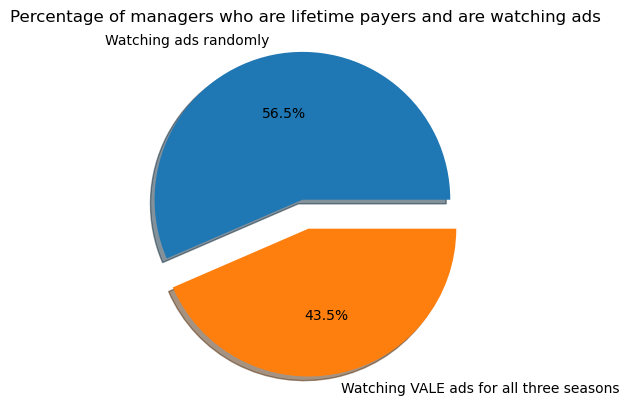

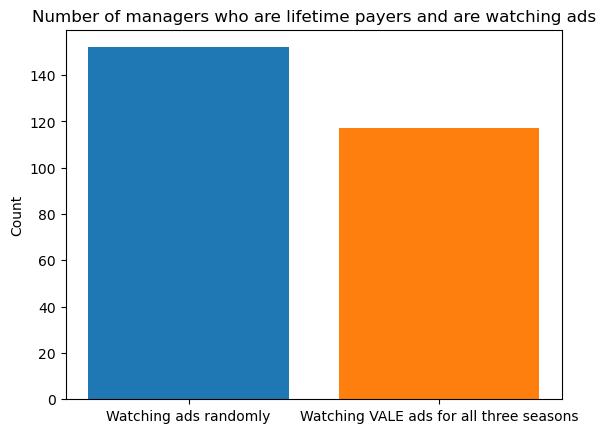

In [58]:
xx = np.array([len(df1['global_user_id'][(df1['is_payer_lifetime'] == True) & (df1['global_user_id'].isin(df2['global_user_id'])) & (~df1['global_user_id'].isin(np.intersect1d(managers_that_watched_VALE_ads_every_season, df1['global_user_id'][df1['is_payer_lifetime'] == True].unique())))].unique()), len(np.intersect1d(managers_that_watched_VALE_ads_every_season, df1['global_user_id'][df1['is_payer_lifetime'] == True].unique()))])
labelss = ['Watching ads randomly', 'Watching VALE ads for all three seasons'] 
myexplode = [0.1] * 2

plt.pie(xx, labels = labelss, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers who are lifetime payers and are watching ads")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labelss, xx, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who are lifetime payers and are watching ads")
plt.show()

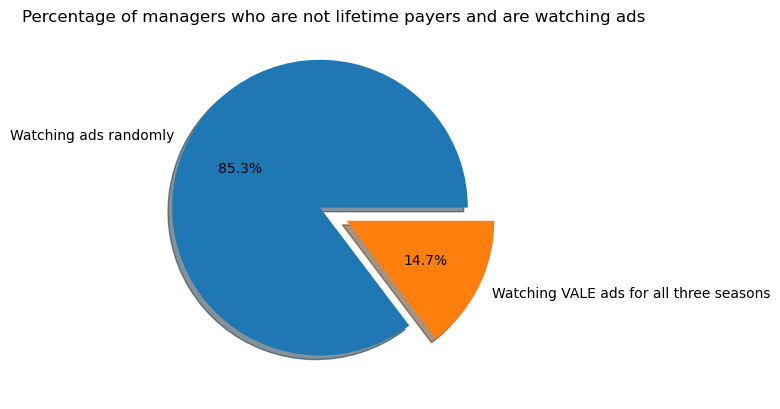

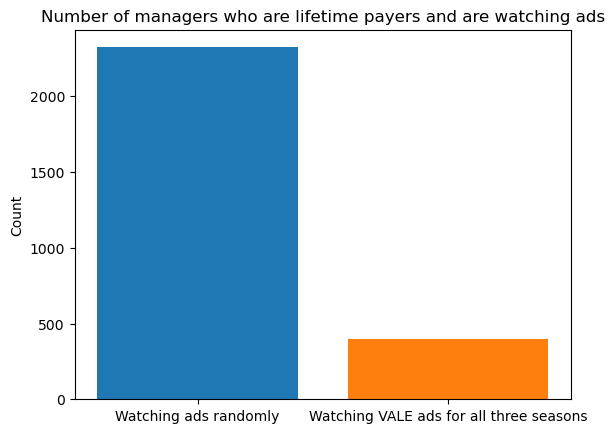

In [59]:
xx = np.array([len(df1['global_user_id'][(df1['is_payer_lifetime'] == False) & (df1['global_user_id'].isin(df2['global_user_id'])) & (~df1['global_user_id'].isin(np.intersect1d(managers_that_watched_VALE_ads_every_season, df1['global_user_id'][df1['is_payer_lifetime'] == False].unique())))].unique()), len(np.intersect1d(managers_that_watched_VALE_ads_every_season, df1['global_user_id'][df1['is_payer_lifetime'] == False].unique()))])
labelss = ['Watching ads randomly', 'Watching VALE ads for all three seasons'] 
myexplode = [0.1] * 2

plt.pie(xx, labels = labelss, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of managers who are not lifetime payers and are watching ads")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(labelss, xx, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who are lifetime payers and are watching ads")
plt.show()

<h1>Analysis for all inputs in the dataset</h1>

<h1>Season 166</h1>

In [60]:
print("Number of managers who watched at least one video ad / number of managers from task_table_2.csv is", len(df1_that_watched_ads_season1['global_user_id'].unique()))

Number of managers who watched at least one video ad / number of managers from task_table_2.csv is 1795


For every user from task_table_2.csv we have corresponding data row in task_table_1.csv.

In [61]:
print("Number of managers who didn't watch video ads is", len(df1_that_NO_watched_ads_season1['global_user_id'].unique()))

Number of managers who didn't watch video ads is 7504


In [62]:
df1_that_watched_ads_VALE_active_season1 = df1_that_watched_ads_season1[df1_that_watched_ads_season1['season_day'].isin(season_day_VALE_active)]
df1_that_watched_ads_VALE_NOT_active_season1 = df1_that_watched_ads_season1[~df1_that_watched_ads_season1['season_day'].isin(season_day_VALE_active)]

dates_VALE_active_season1 = df1_seasons[0]['date'][df1_seasons[0]['season_day'].isin(season_day_VALE_active)].unique()
dates_VALE_NOT_active_season1 = np.array(list(set(season1_dates) - set(dates_VALE_active_season1)))

In [63]:
net_revenue_VALE_ads_season1 = df2_VALE_ads_season1['net_revenue'].sum()
net_revenue_regular_ads_season1_while_VALE_active = df2_regular_ads_season1['net_revenue'][df2_regular_ads_season1['date'].isin(dates_VALE_active_season1)].sum()
net_revenue_regular_ads_season1_while_VALE_NO_active = net_revenue_regular_ads_season1 - net_revenue_regular_ads_season1_while_VALE_active

print("Net revenue from VALE ads in season 166 is", net_revenue_VALE_ads_season1)
print("Net revenue from REGULAR ads while VALE ads are active in season 166 is", net_revenue_regular_ads_season1_while_VALE_active)
print("Net revenue from REGULAR ads while VALE ads are not active in season 166 is", net_revenue_regular_ads_season1_while_VALE_NO_active)

Net revenue from VALE ads in season 166 is 23.160870000000003
Net revenue from REGULAR ads while VALE ads are active in season 166 is 71.949883
Net revenue from REGULAR ads while VALE ads are not active in season 166 is 133.543562


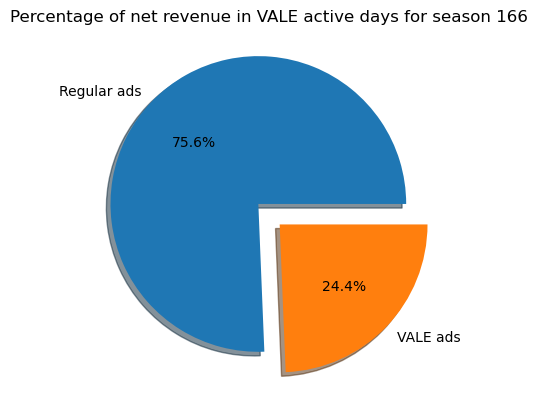

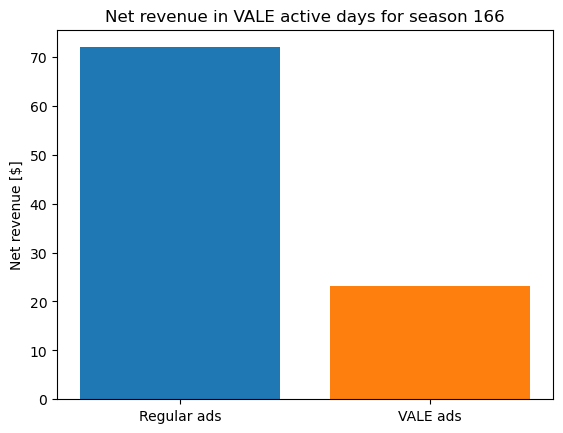

In [64]:
y = np.array([net_revenue_regular_ads_season1_while_VALE_active, net_revenue_VALE_ads_season1])
mylabels = ["Regular ads", "VALE ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of net revenue in VALE active days for season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("Net revenue in VALE active days for season 166")
plt.show()

In [65]:
indexes_VALE_ads_season1_attack = []
indexes_VALE_ads_season1_midfield = []
indexes_VALE_ads_season1_defence = []

for item in indexes_VALE_ads_season1:
    if 'ATTACK' in item:
        indexes_VALE_ads_season1_attack.append(item)
    elif 'MIDFIELD' in item:
        indexes_VALE_ads_season1_midfield.append(item)
    elif 'DEFENCE' in item:
        indexes_VALE_ads_season1_defence.append(item)

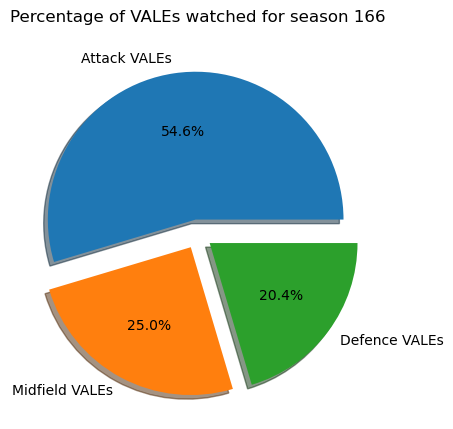

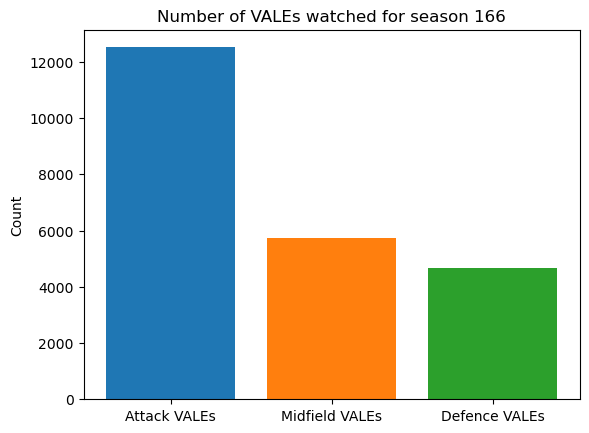

In [66]:
num_of_attack_VALE_season1 = df2_season1['reason'][df2_season1['reason'].isin(indexes_VALE_ads_season1_attack)].count()
num_of_midfield_VALE_season1 = df2_season1['reason'][df2_season1['reason'].isin(indexes_VALE_ads_season1_midfield)].count()
num_of_defence_VALE_season1 = df2_season1['reason'][df2_season1['reason'].isin(indexes_VALE_ads_season1_defence)].count()

y = np.array([num_of_attack_VALE_season1, num_of_midfield_VALE_season1, num_of_defence_VALE_season1])
mylabels = ["Attack VALEs", "Midfield VALEs", "Defence VALEs"]
myexplode = [0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of VALEs watched for season 166", pad = 20)
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of VALEs watched for season 166")
plt.show()

<h1>Season 167</h1>

Number of managers who watched at least one video ad / number of managers from task_table_2.csv is 1719 

Number of managers who didn't watch video ads is 6277 

Net revenue from VALE ads in season 167 is 21.30326
Net revenue from REGULAR ads while VALE ads are active in season 167 is 68.62377500000001
Net revenue from REGULAR ads while VALE ads are not active in season 167 is 141.46372627600005


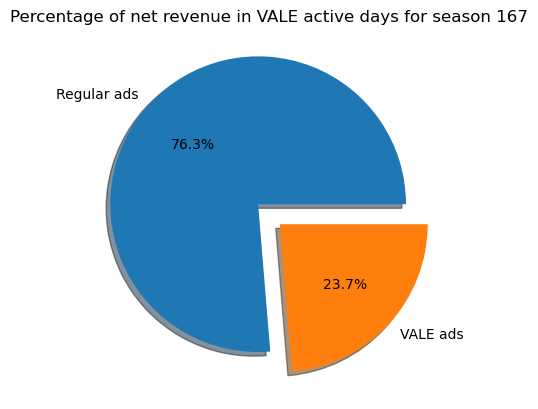

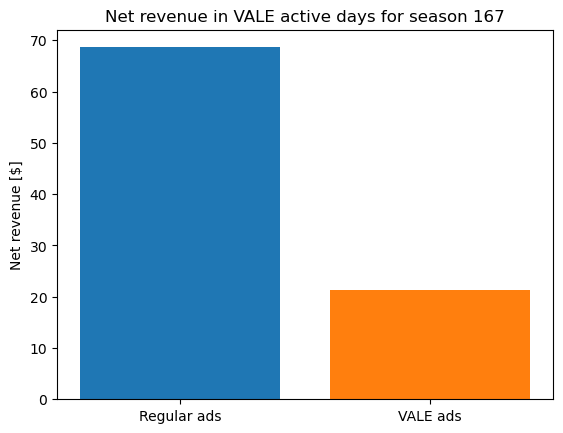

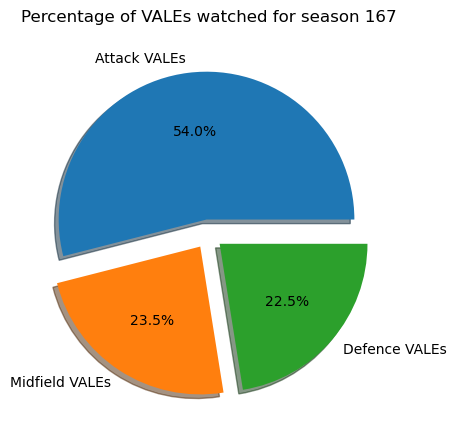

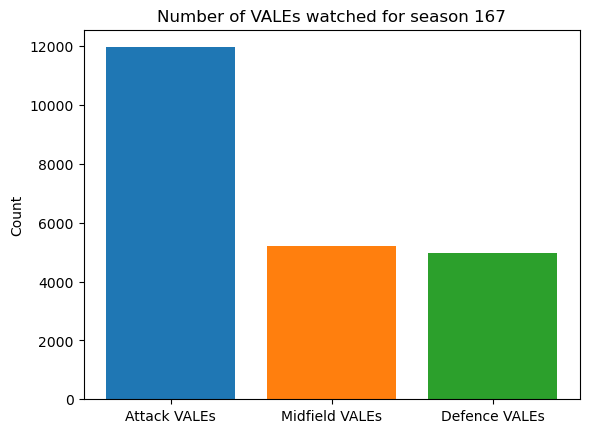

In [67]:
print("Number of managers who watched at least one video ad / number of managers from task_table_2.csv is", len(df1_that_watched_ads_season2['global_user_id'].unique()), "\n")

print("Number of managers who didn't watch video ads is", len(df1_that_NO_watched_ads_season2['global_user_id'].unique()), "\n")

df1_that_watched_ads_VALE_active_season2 = df1_that_watched_ads_season2[df1_that_watched_ads_season2['season_day'].isin(season_day_VALE_active)]
df1_that_watched_ads_VALE_NOT_active_season2 = df1_that_watched_ads_season2[~df1_that_watched_ads_season2['season_day'].isin(season_day_VALE_active)]

dates_VALE_active_season2 = df1_seasons[1]['date'][df1_seasons[1]['season_day'].isin(season_day_VALE_active)].unique()
dates_VALE_NOT_active_season2 = np.array(list(set(season2_dates) - set(dates_VALE_active_season2)))


net_revenue_VALE_ads_season2 = df2_VALE_ads_season2['net_revenue'].sum()
net_revenue_regular_ads_season2_while_VALE_active = df2_regular_ads_season2['net_revenue'][df2_regular_ads_season2['date'].isin(dates_VALE_active_season2)].sum()
net_revenue_regular_ads_season2_while_VALE_NO_active = net_revenue_regular_ads_season2 - net_revenue_regular_ads_season2_while_VALE_active

print("Net revenue from VALE ads in season 167 is", net_revenue_VALE_ads_season2)
print("Net revenue from REGULAR ads while VALE ads are active in season 167 is", net_revenue_regular_ads_season2_while_VALE_active)
print("Net revenue from REGULAR ads while VALE ads are not active in season 167 is", net_revenue_regular_ads_season2_while_VALE_NO_active)


y = np.array([net_revenue_regular_ads_season2_while_VALE_active, net_revenue_VALE_ads_season2])
mylabels = ["Regular ads", "VALE ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of net revenue in VALE active days for season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("Net revenue in VALE active days for season 167")
plt.show()


indexes_VALE_ads_season2_attack = []
indexes_VALE_ads_season2_midfield = []
indexes_VALE_ads_season2_defence = []

for item in indexes_VALE_ads_season2:
    if 'ATTACK' in item:
        indexes_VALE_ads_season2_attack.append(item)
    elif 'MIDFIELD' in item:
        indexes_VALE_ads_season2_midfield.append(item)
    elif 'DEFENCE' in item:
        indexes_VALE_ads_season2_defence.append(item)

        
num_of_attack_VALE_season2 = df2_season2['reason'][df2_season2['reason'].isin(indexes_VALE_ads_season2_attack)].count()
num_of_midfield_VALE_season2 = df2_season2['reason'][df2_season2['reason'].isin(indexes_VALE_ads_season2_midfield)].count()
num_of_defence_VALE_season2 = df2_season2['reason'][df2_season2['reason'].isin(indexes_VALE_ads_season2_defence)].count()

y = np.array([num_of_attack_VALE_season2, num_of_midfield_VALE_season2, num_of_defence_VALE_season2])
mylabels = ["Attack VALEs", "Midfield VALEs", "Defence VALEs"]
myexplode = [0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of VALEs watched for season 167", pad = 20)
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of VALEs watched for season 167")
plt.show()

<h1>Season 168</h1>

Number of managers who watched at least one video ad / number of managers from task_table_2.csv is 1677 

Number of managers who didn't watch video ads is 6193 

Net revenue from VALE ads in season 168 is 21.24849
Net revenue from REGULAR ads while VALE ads are active in season 168 is 66.844623
Net revenue from REGULAR ads while VALE ads are not active in season 168 is 139.01194900000002


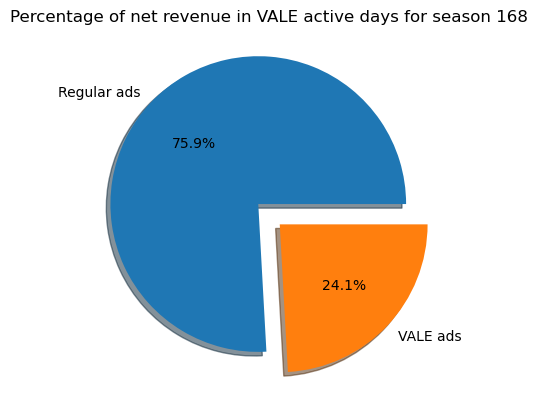

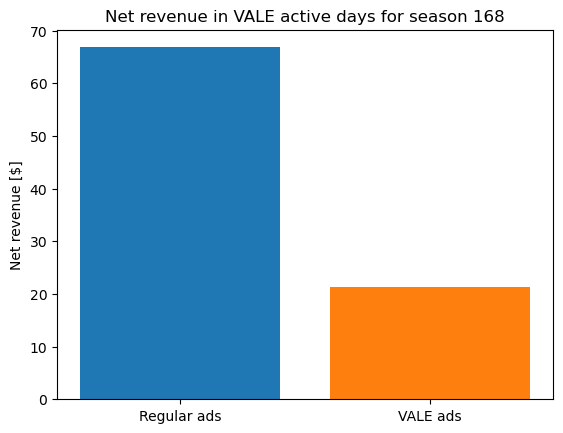

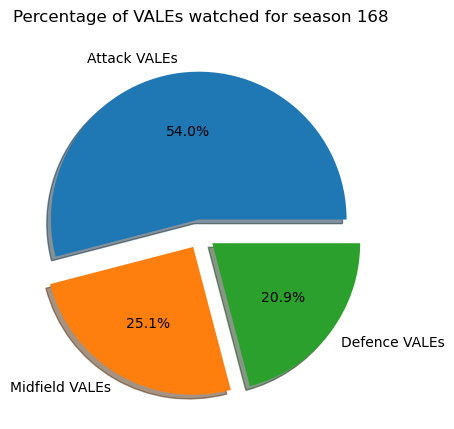

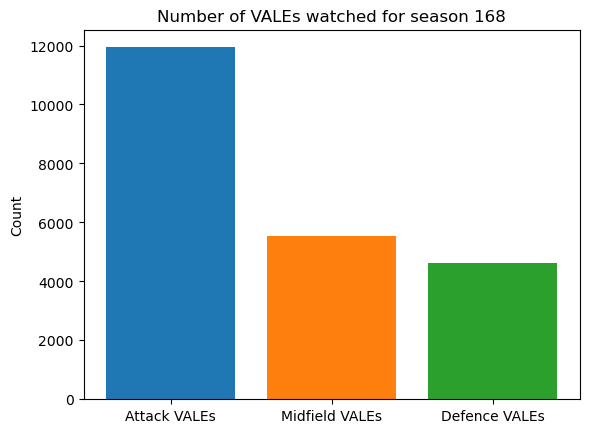

In [68]:
print("Number of managers who watched at least one video ad / number of managers from task_table_2.csv is", len(df1_that_watched_ads_season3['global_user_id'].unique()), "\n")

print("Number of managers who didn't watch video ads is", len(df1_that_NO_watched_ads_season3['global_user_id'].unique()), "\n")

df1_that_watched_ads_VALE_active_season3 = df1_that_watched_ads_season3[df1_that_watched_ads_season3['season_day'].isin(season_day_VALE_active)]
df1_that_watched_ads_VALE_NOT_active_season3 = df1_that_watched_ads_season3[~df1_that_watched_ads_season3['season_day'].isin(season_day_VALE_active)]

dates_VALE_active_season3 = df1_seasons[2]['date'][df1_seasons[2]['season_day'].isin(season_day_VALE_active)].unique()
dates_VALE_NOT_active_season3 = np.array(list(set(season3_dates) - set(dates_VALE_active_season3)))


net_revenue_VALE_ads_season3 = df2_VALE_ads_season3['net_revenue'].sum()
net_revenue_regular_ads_season3_while_VALE_active = df2_regular_ads_season3['net_revenue'][df2_regular_ads_season3['date'].isin(dates_VALE_active_season3)].sum()
net_revenue_regular_ads_season3_while_VALE_NO_active = net_revenue_regular_ads_season3 - net_revenue_regular_ads_season3_while_VALE_active

print("Net revenue from VALE ads in season 168 is", net_revenue_VALE_ads_season3)
print("Net revenue from REGULAR ads while VALE ads are active in season 168 is", net_revenue_regular_ads_season3_while_VALE_active)
print("Net revenue from REGULAR ads while VALE ads are not active in season 168 is", net_revenue_regular_ads_season3_while_VALE_NO_active)


y = np.array([net_revenue_regular_ads_season3_while_VALE_active, net_revenue_VALE_ads_season3])
mylabels = ["Regular ads", "VALE ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.title("Percentage of net revenue in VALE active days for season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("Net revenue in VALE active days for season 168")
plt.show()


indexes_VALE_ads_season3_attack = []
indexes_VALE_ads_season3_midfield = []
indexes_VALE_ads_season3_defence = []

for item in indexes_VALE_ads_season3:
    if 'ATTACK' in item:
        indexes_VALE_ads_season3_attack.append(item)
    elif 'MIDFIELD' in item:
        indexes_VALE_ads_season3_midfield.append(item)
    elif 'DEFENCE' in item:
        indexes_VALE_ads_season3_defence.append(item)

        
num_of_attack_VALE_season3 = df2_season3['reason'][df2_season3['reason'].isin(indexes_VALE_ads_season3_attack)].count()
num_of_midfield_VALE_season3 = df2_season3['reason'][df2_season3['reason'].isin(indexes_VALE_ads_season3_midfield)].count()
num_of_defence_VALE_season3 = df2_season3['reason'][df2_season3['reason'].isin(indexes_VALE_ads_season3_defence)].count()

y = np.array([num_of_attack_VALE_season3, num_of_midfield_VALE_season3, num_of_defence_VALE_season3])
mylabels = ["Attack VALEs", "Midfield VALEs", "Defence VALEs"]
myexplode = [0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of VALEs watched for season 168", pad = 20)
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of VALEs watched for season 168")
plt.show()

<h1>Overall analysis for all seasons - VALE active days</h1>

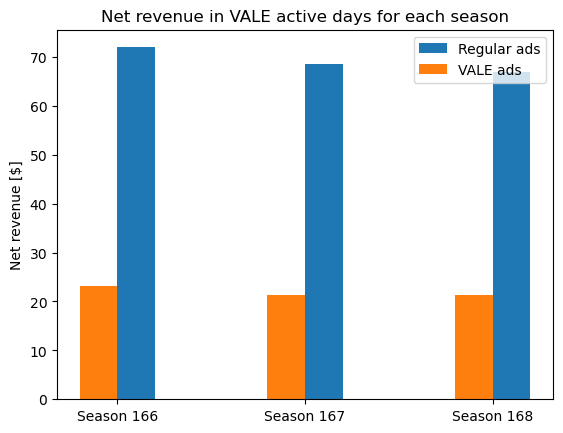

In [69]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [net_revenue_regular_ads_season1_while_VALE_active, net_revenue_regular_ads_season2_while_VALE_active, net_revenue_regular_ads_season3_while_VALE_active]
Y2 = [net_revenue_VALE_ads_season1, net_revenue_VALE_ads_season2, net_revenue_VALE_ads_season3]

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.1, Y1, label = 'Regular ads', width = 0.2)
plt.bar(X_axis - 0.1, Y2, label = 'VALE ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Net revenue [$]")
plt.title("Net revenue in VALE active days for each season")
plt.legend()
plt.show()

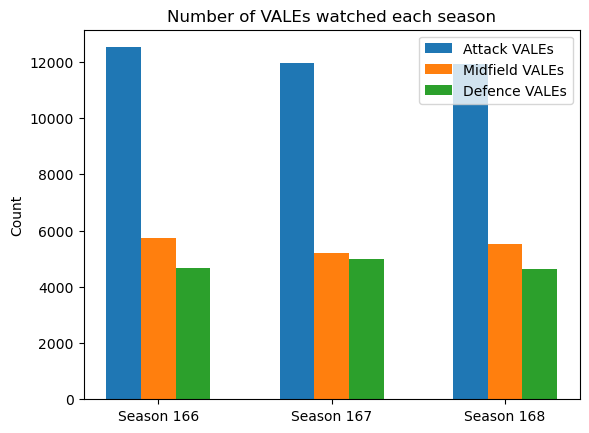

In [70]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [num_of_attack_VALE_season1, num_of_attack_VALE_season2, num_of_attack_VALE_season3]
Y2 = [num_of_midfield_VALE_season1, num_of_midfield_VALE_season2, num_of_midfield_VALE_season3]
Y3 = [num_of_defence_VALE_season1, num_of_defence_VALE_season2, num_of_defence_VALE_season3]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y1, label = 'Attack VALEs', width = 0.2)
plt.bar(X_axis , Y2, label = 'Midfield VALEs', width = 0.2)
plt.bar(X_axis + 0.2, Y3, label = 'Defence VALEs', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Number of VALEs watched each season")
plt.legend()
plt.show()

<h1>Analysis based on iap info</h1>

<h1>Season 166</h1><br>
Let's see if a managers who are iap payers watch ads:

In [71]:
managers_payer_lifetime_season1 = df1_seasons[0]['global_user_id'][df1_seasons[0]['is_payer_lifetime'] == True].unique()
managers_NO_payer_lifetime_season1 = df1_seasons[0]['global_user_id'][df1_seasons[0]['is_payer_lifetime'] == False].unique()

Number of managers who use/don't use iap:

In [72]:
len(managers_payer_lifetime_season1), len(managers_NO_payer_lifetime_season1)

(301, 9029)

For those who use/don't use iap, number of managers that watch video ads:

In [73]:
len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_payer_lifetime_season1)].unique()), len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_NO_payer_lifetime_season1)].unique())

(204, 1621)

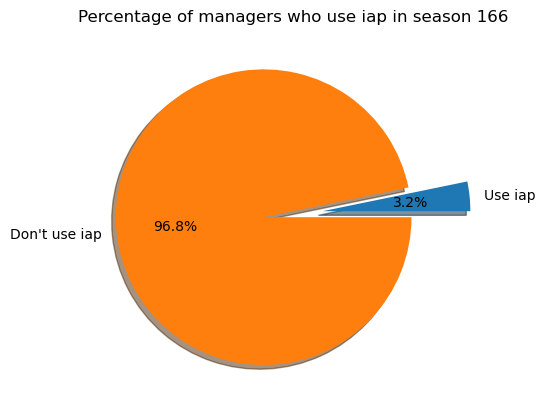

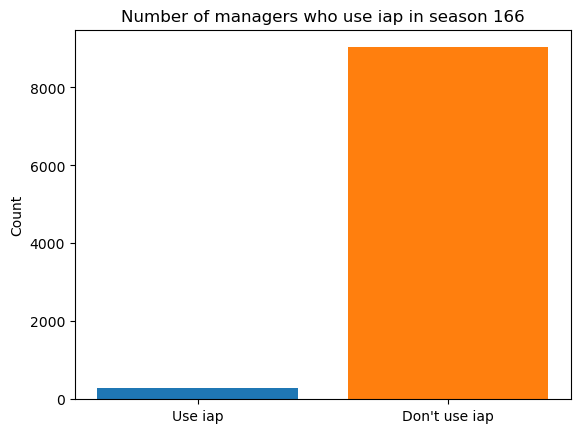

In [74]:
y = np.array([len(managers_payer_lifetime_season1), len(managers_NO_payer_lifetime_season1)])
mylabels = ["Use iap", "Don't use iap"]
myexplode = [0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 166")
plt.show()

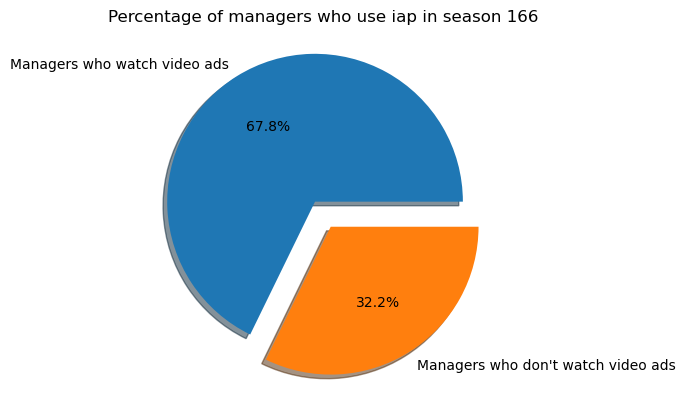

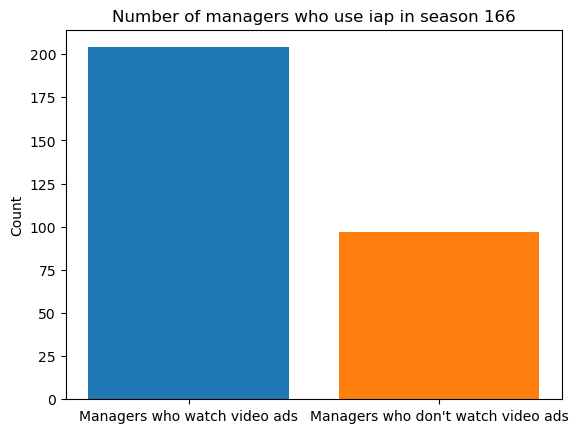

In [75]:
y = np.array([len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_payer_lifetime_season1)].unique()), len(managers_payer_lifetime_season1) - len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_payer_lifetime_season1)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 166")
plt.show()

About 67.8% of managers who use iap watch ads. It is because managers who pay for the game play the game more on daily basis which implicates that they will watch more ads.

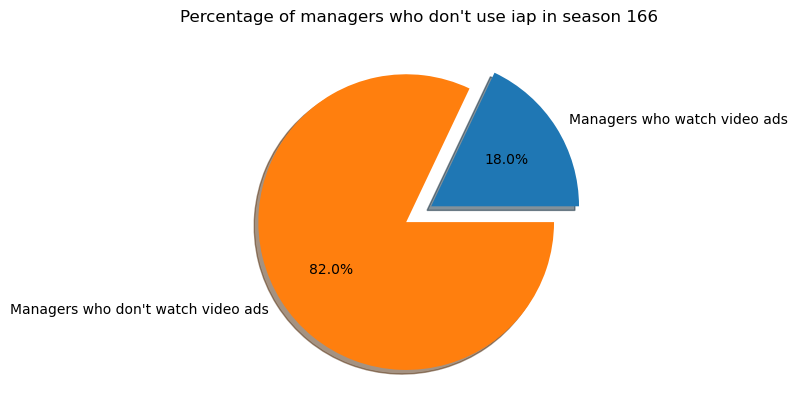

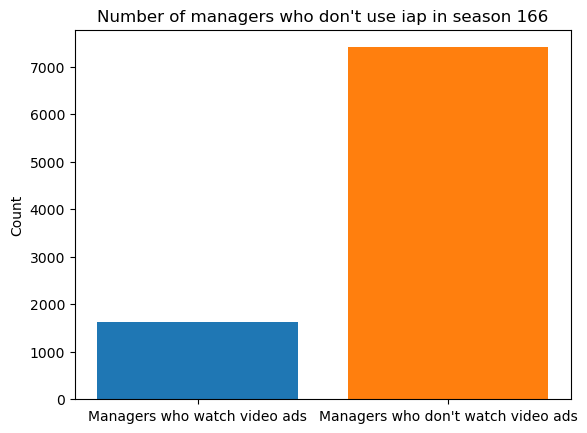

In [76]:
y = np.array([len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_NO_payer_lifetime_season1)].unique()), len(managers_NO_payer_lifetime_season1) - len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_NO_payer_lifetime_season1)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap in season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap in season 166")
plt.show()

For the managers who don't use iap we can see that only about 18% of them watch ads. It is because there are many managers who are new to the game and managers who are not playing the game as much on daily basis. Let's see if it's true.

For the managers who are not using iap I'll add one more condition to drop managers who are new to the game - cohort day needs to be >28 which means that I'm considering only managers who played at least one season.

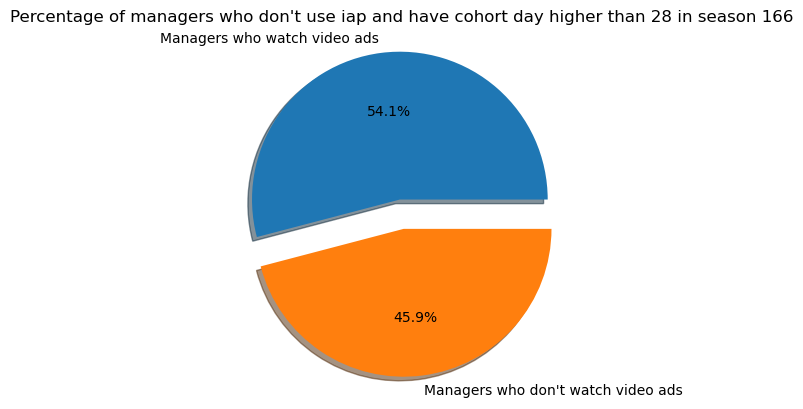

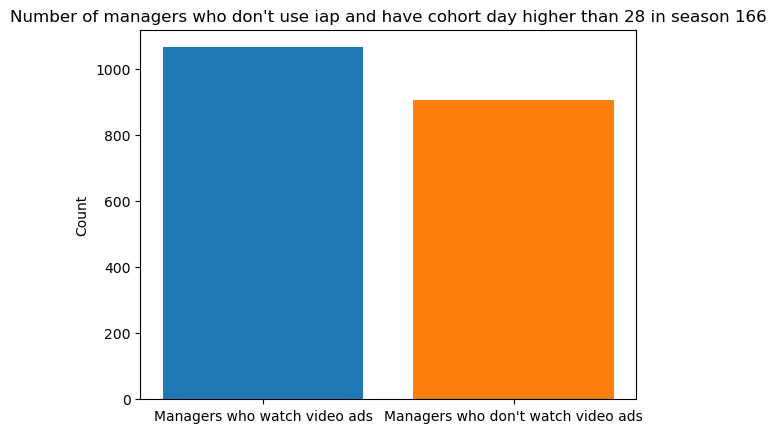

In [77]:
y = np.array([len(np.intersect1d(df1_seasons[0]['global_user_id'][df1_seasons[0]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season1['global_user_id'].unique(), managers_NO_payer_lifetime_season1))),
              len(np.intersect1d(df1_seasons[0]['global_user_id'][df1_seasons[0]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season1['global_user_id'].unique(), managers_NO_payer_lifetime_season1)))])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap and have cohort day higher than 28 in season 166")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap and have cohort day higher than 28 in season 166")
plt.show()

Now we got much better situation, managers who are playing the game for at least one season are watching ads much more.

Let's see for how long a lifetime payer/no lifetime payer has been playing the game on average (days, seasons) considering only managers with cohort day >28:

In [78]:
df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean(), df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean() / 28

(796.0261868558878, 28.429506673424562)

In [79]:
df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_NO_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean(), df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_NO_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean() / 28

(344.59682228176774, 12.30702936720599)

Average cohort day for season 166 considering only managers with cohort day >28:

In [80]:
df1_seasons[0]['cohort_day'][df1_seasons[0]['cohort_day'] > 28].mean()

429.4895569916643

Lifetime payers are playing the game for much longer period of time than the no lifetime payers.

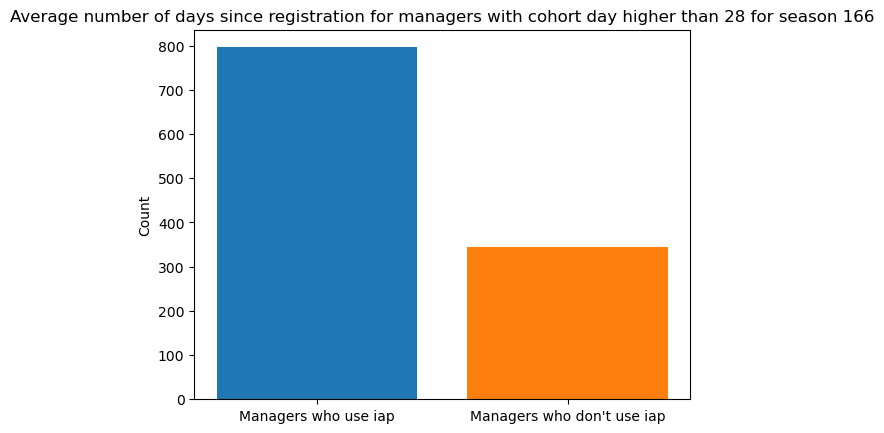

In [81]:
y = np.array([df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean(), df1_seasons[0]['cohort_day'][(df1_seasons[0]['global_user_id'].isin(managers_NO_payer_lifetime_season1)) & (df1_seasons[0]['cohort_day'] > 28)].mean()])
mylabels = ["Managers who use iap", "Managers who don't use iap"]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Average number of days since registration for managers with cohort day higher than 28 for season 166")
plt.show()

Using condition for cohort days we don't affect data much for managers who use iap because most of them are users who are playing the game for long period of time. On the other side, it is easier to extract managers who are new to the game because most of the managers who are new to the game won't be using iap transactions immediately.

<h1>Season 167</h1>

291 7720
201 1532


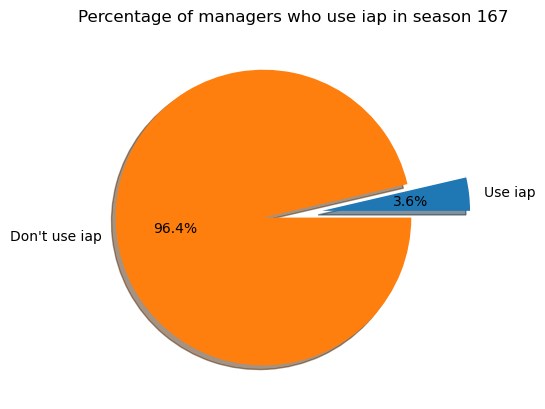

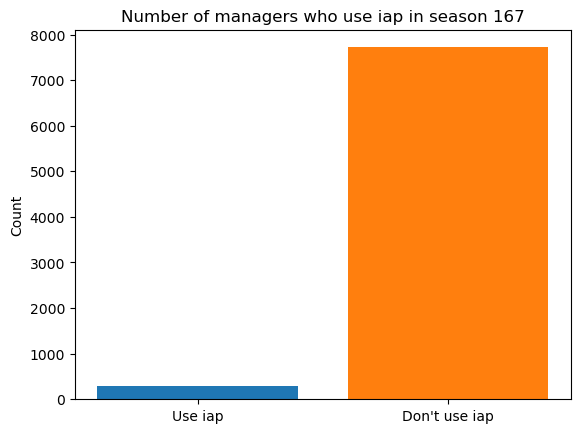

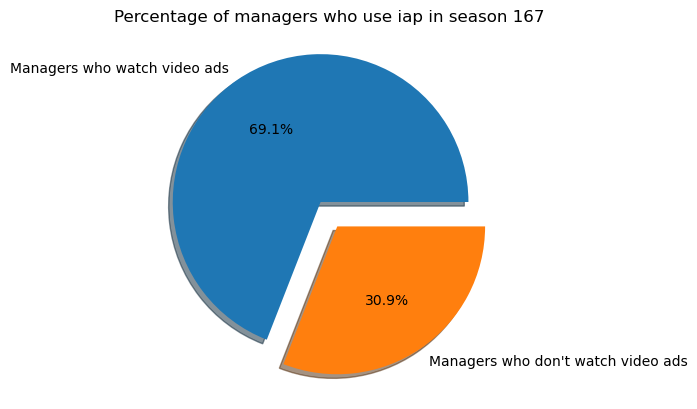

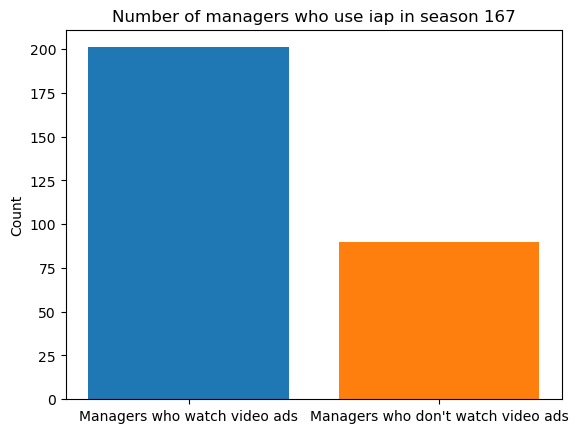

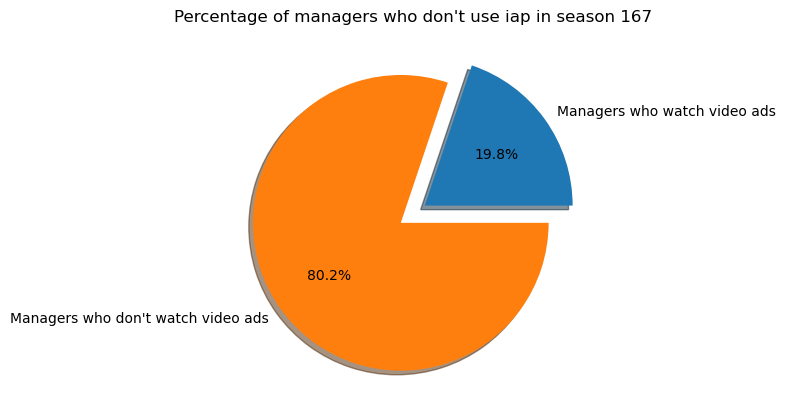

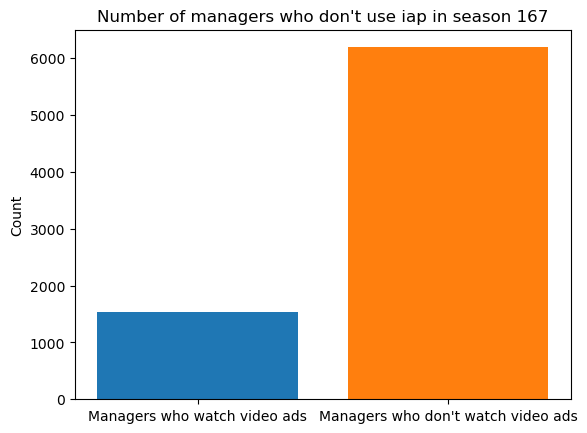

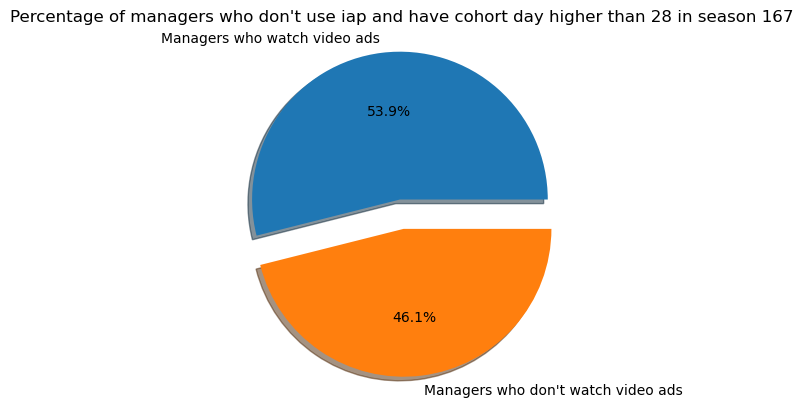

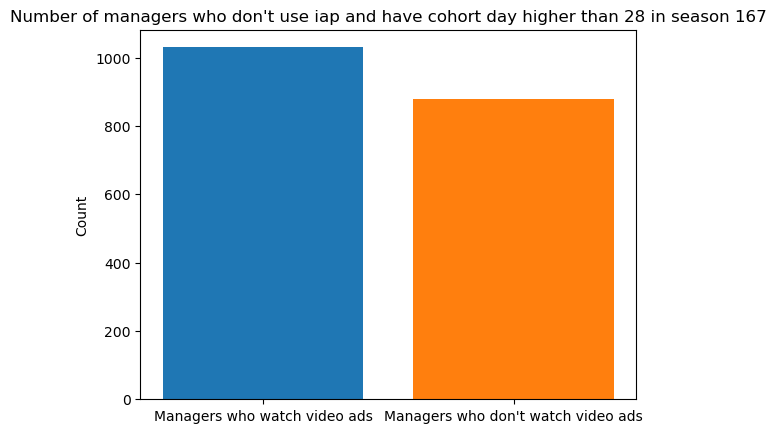

827.14670963365 29.5409539154875
348.13396451468617 12.433355875524507
435.8249301010846


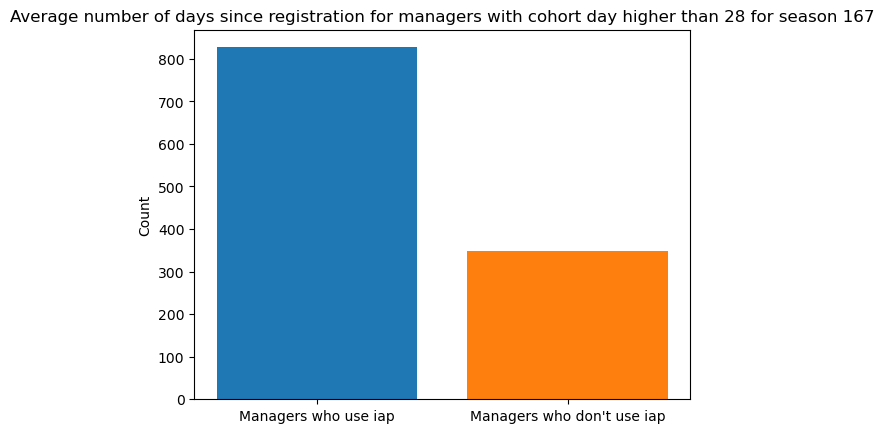

In [82]:
managers_payer_lifetime_season2 = df1_seasons[1]['global_user_id'][df1_seasons[1]['is_payer_lifetime'] == True].unique()
managers_NO_payer_lifetime_season2 = df1_seasons[1]['global_user_id'][df1_seasons[1]['is_payer_lifetime'] == False].unique()

print(len(managers_payer_lifetime_season2), len(managers_NO_payer_lifetime_season2))

print(len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_payer_lifetime_season2)].unique()), len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_NO_payer_lifetime_season2)].unique()))

y = np.array([len(managers_payer_lifetime_season2), len(managers_NO_payer_lifetime_season2)])
mylabels = ["Use iap", "Don't use iap"]
myexplode = [0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 167")
plt.show()

y = np.array([len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_payer_lifetime_season2)].unique()), len(managers_payer_lifetime_season2) - len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_payer_lifetime_season2)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 167")
plt.show()

y = np.array([len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_NO_payer_lifetime_season2)].unique()), len(managers_NO_payer_lifetime_season2) - len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_NO_payer_lifetime_season2)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap in season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap in season 167")
plt.show()

y = np.array([len(np.intersect1d(df1_seasons[1]['global_user_id'][df1_seasons[1]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season2['global_user_id'].unique(), managers_NO_payer_lifetime_season2))),
              len(np.intersect1d(df1_seasons[1]['global_user_id'][df1_seasons[1]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season2['global_user_id'].unique(), managers_NO_payer_lifetime_season2)))])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap and have cohort day higher than 28 in season 167")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap and have cohort day higher than 28 in season 167")
plt.show()

print(df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean(), df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean() / 28)

print(df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_NO_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean(), df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_NO_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean() / 28)

print(df1_seasons[1]['cohort_day'][df1_seasons[1]['cohort_day'] > 28].mean())

y = np.array([df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean(), df1_seasons[1]['cohort_day'][(df1_seasons[1]['global_user_id'].isin(managers_NO_payer_lifetime_season2)) & (df1_seasons[1]['cohort_day'] > 28)].mean()])
mylabels = ["Managers who use iap", "Managers who don't use iap"]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Average number of days since registration for managers with cohort day higher than 28 for season 167")
plt.show()

<h1>Season 168</h1>

289 7602
201 1494


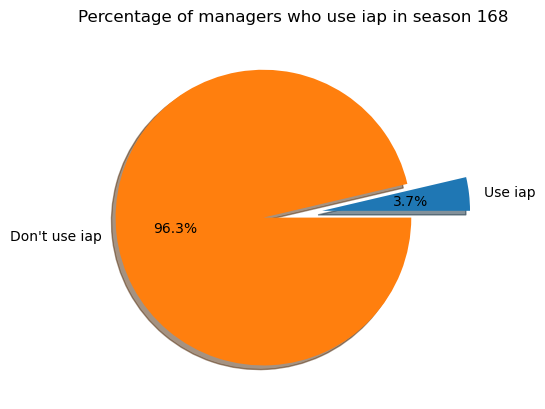

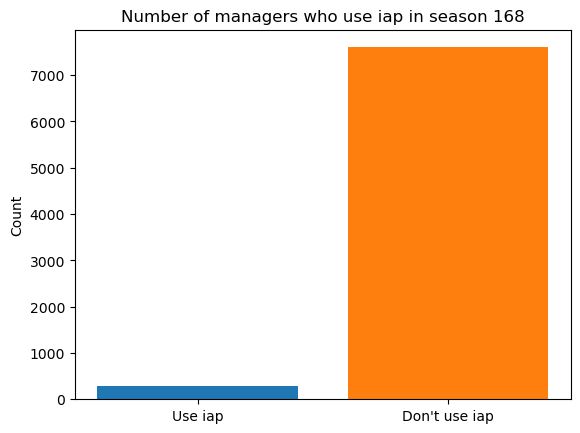

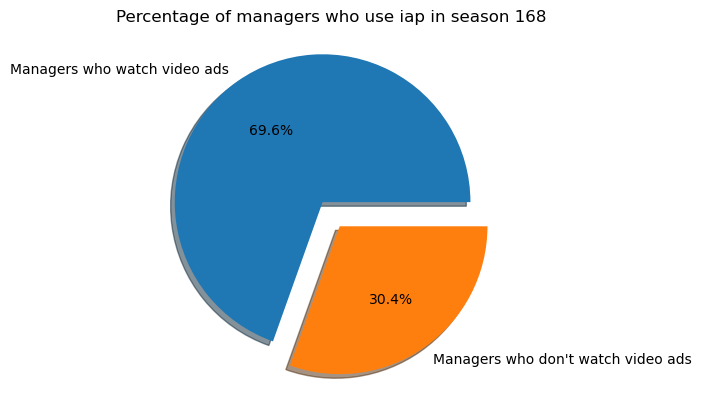

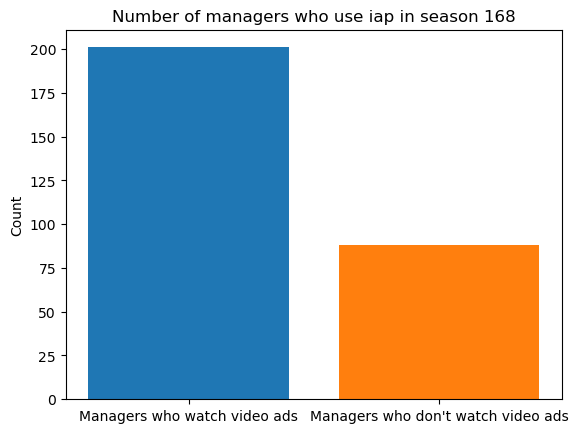

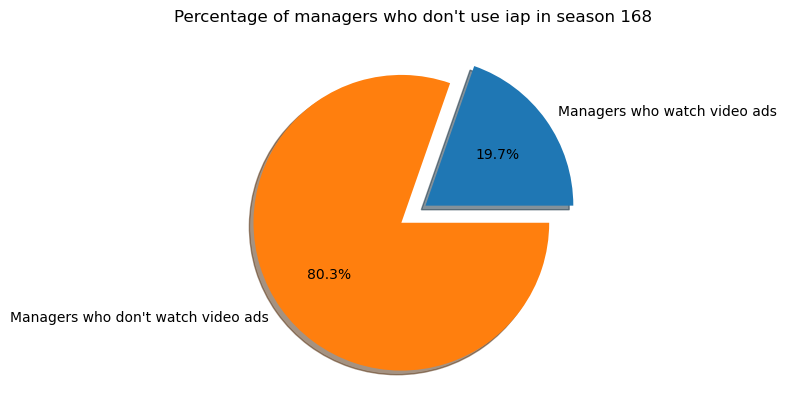

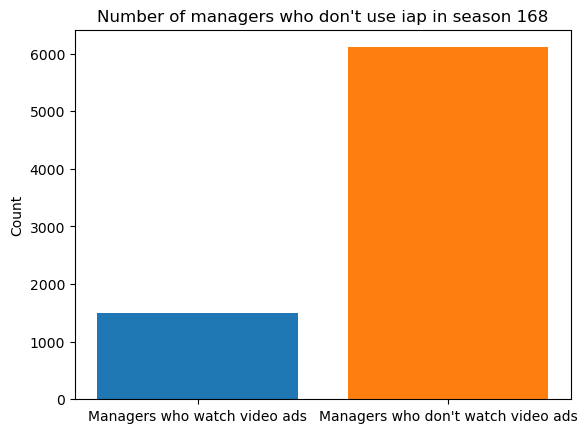

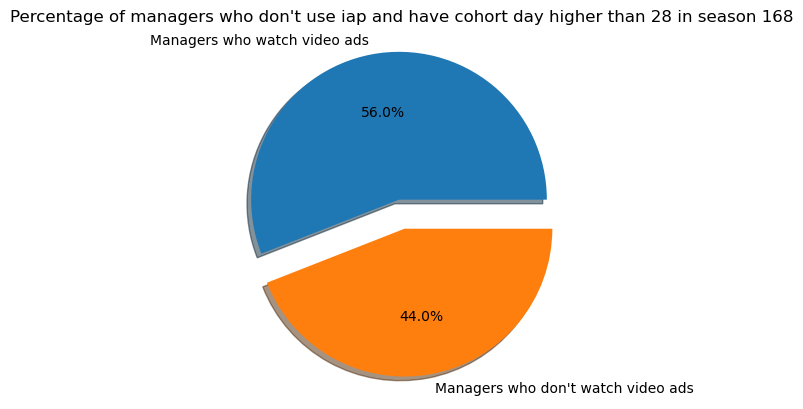

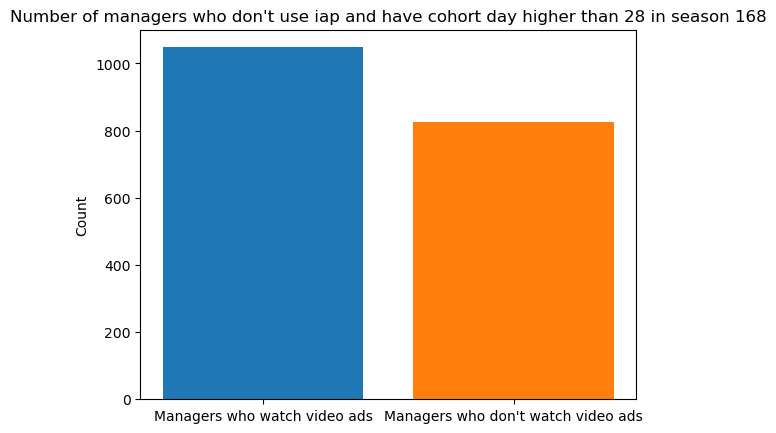

840.6308202154102 30.022529293407505
352.6835969712872 12.595842748974544
443.16023124246453


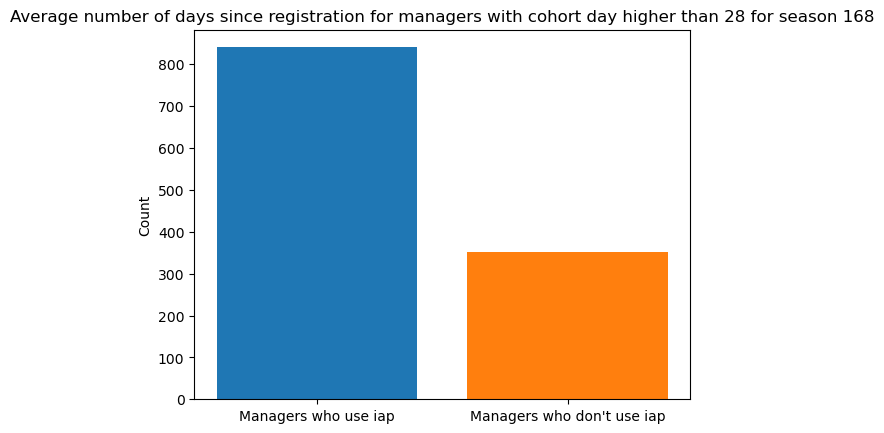

In [83]:
managers_payer_lifetime_season3 = df1_seasons[2]['global_user_id'][df1_seasons[2]['is_payer_lifetime'] == True].unique()
managers_NO_payer_lifetime_season3 = df1_seasons[2]['global_user_id'][df1_seasons[2]['is_payer_lifetime'] == False].unique()

print(len(managers_payer_lifetime_season3), len(managers_NO_payer_lifetime_season3))

print(len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_payer_lifetime_season3)].unique()), len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_NO_payer_lifetime_season3)].unique()))

y = np.array([len(managers_payer_lifetime_season3), len(managers_NO_payer_lifetime_season3)])
mylabels = ["Use iap", "Don't use iap"]
myexplode = [0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 168")
plt.show()

y = np.array([len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_payer_lifetime_season3)].unique()), len(managers_payer_lifetime_season3) - len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_payer_lifetime_season3)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who use iap in season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who use iap in season 168")
plt.show()

y = np.array([len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_NO_payer_lifetime_season3)].unique()), len(managers_NO_payer_lifetime_season3) - len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_NO_payer_lifetime_season3)].unique())])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap in season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap in season 168")
plt.show()

y = np.array([len(np.intersect1d(df1_seasons[2]['global_user_id'][df1_seasons[2]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season3['global_user_id'].unique(), managers_NO_payer_lifetime_season3))),
              len(np.intersect1d(df1_seasons[2]['global_user_id'][df1_seasons[2]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season3['global_user_id'].unique(), managers_NO_payer_lifetime_season3)))])
mylabels = ["Managers who watch video ads", "Managers who don't watch video ads"]
myexplode = [0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.title("Percentage of managers who don't use iap and have cohort day higher than 28 in season 168")
plt.show()

colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255)]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap and have cohort day higher than 28 in season 168")
plt.show()

print(df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean(), df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean() / 28)

print(df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_NO_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean(), df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_NO_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean() / 28)

print(df1_seasons[2]['cohort_day'][df1_seasons[2]['cohort_day'] > 28].mean())

y = np.array([df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean(), df1_seasons[2]['cohort_day'][(df1_seasons[2]['global_user_id'].isin(managers_NO_payer_lifetime_season3)) & (df1_seasons[2]['cohort_day'] > 28)].mean()])
mylabels = ["Managers who use iap", "Managers who don't use iap"]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Count")
plt.title("Average number of days since registration for managers with cohort day higher than 28 for season 168")
plt.show()

<h1>Overall analysis for all seasons - based on iap info</h1>

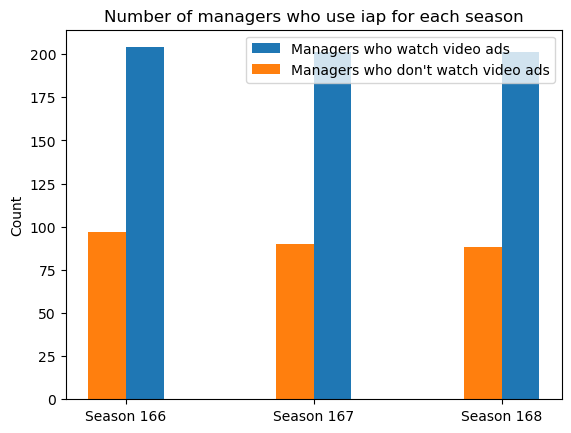

In [84]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_payer_lifetime_season1)].unique()), len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_payer_lifetime_season2)].unique()), len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_payer_lifetime_season3)].unique())]
Y2 = [len(managers_payer_lifetime_season1) - len(df2_season1['global_user_id'][df2_season1['global_user_id'].isin(managers_payer_lifetime_season1)].unique()), len(managers_payer_lifetime_season2) - len(df2_season2['global_user_id'][df2_season2['global_user_id'].isin(managers_payer_lifetime_season2)].unique()), len(managers_payer_lifetime_season3) - len(df2_season3['global_user_id'][df2_season3['global_user_id'].isin(managers_payer_lifetime_season3)].unique())]

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.1, Y1, label = 'Managers who watch video ads', width = 0.2)
plt.bar(X_axis - 0.1, Y2, label = 'Managers who don\'t watch video ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Number of managers who use iap for each season")
plt.legend()
plt.show()

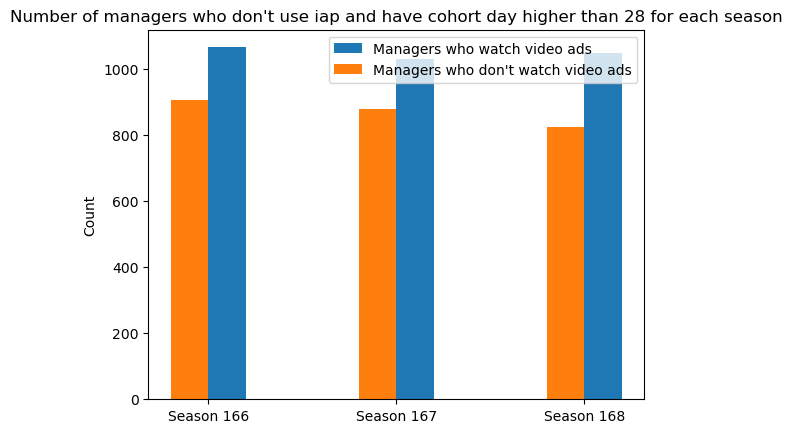

In [85]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [len(np.intersect1d(df1_seasons[0]['global_user_id'][df1_seasons[0]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season1['global_user_id'].unique(), managers_NO_payer_lifetime_season1))), len(np.intersect1d(df1_seasons[1]['global_user_id'][df1_seasons[1]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season2['global_user_id'].unique(), managers_NO_payer_lifetime_season2))), len(np.intersect1d(df1_seasons[2]['global_user_id'][df1_seasons[2]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_watched_ads_season3['global_user_id'].unique(), managers_NO_payer_lifetime_season3)))]
Y2 = [len(np.intersect1d(df1_seasons[0]['global_user_id'][df1_seasons[0]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season1['global_user_id'].unique(), managers_NO_payer_lifetime_season1))), len(np.intersect1d(df1_seasons[1]['global_user_id'][df1_seasons[1]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season2['global_user_id'].unique(), managers_NO_payer_lifetime_season2))), len(np.intersect1d(df1_seasons[2]['global_user_id'][df1_seasons[2]['cohort_day'] > 28].unique(), np.intersect1d(df1_that_NO_watched_ads_season3['global_user_id'].unique(), managers_NO_payer_lifetime_season3)))]

X_axis = np.arange(len(X))

plt.bar(X_axis + 0.1, Y1, label = 'Managers who watch video ads', width = 0.2)
plt.bar(X_axis - 0.1, Y2, label = 'Managers who don\'t watch video ads', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Number of managers who don't use iap and have cohort day higher than 28 for each season")
plt.legend()
plt.show()

As the season passes by, managers are watching less ads. Let's check if that's the case because of lower daily playtime:

Average playtime in season 166 for average manager (first half of season, whole season, second half of season):

In [86]:
df1_seasons[0]['playtime_daily'][df1_seasons[0]['season_day'] <= 14].mean()

2327499.1467893412

In [87]:
df1_seasons[0]['playtime_daily'].mean()

2297583.9675396015

In [88]:
df1_seasons[0]['playtime_daily'][df1_seasons[0]['season_day'] > 14].mean()

2264752.0990488958

It seems that an average manager on average plays the game less in second half of the season.

Average playtime in season 167 for average manager (first half of season, whole season, second half of season):

In [89]:
df1_seasons[1]['playtime_daily'][df1_seasons[1]['season_day'] <= 14].mean()

2381128.161098

In [90]:
df1_seasons[1]['playtime_daily'].mean()

2266923.399180225

In [91]:
df1_seasons[1]['playtime_daily'][df1_seasons[1]['season_day'] > 14].mean()

2150363.6013944643

Average playtime in season 168 for average manager (first half of season, whole season, second half of season):

In [92]:
df1_seasons[2]['playtime_daily'][df1_seasons[2]['season_day'] <= 14].mean()

2426331.565471682

In [93]:
df1_seasons[2]['playtime_daily'].mean()

2395088.264255437

In [94]:
df1_seasons[2]['playtime_daily'][df1_seasons[2]['season_day'] > 14].mean()

2363056.5013157325

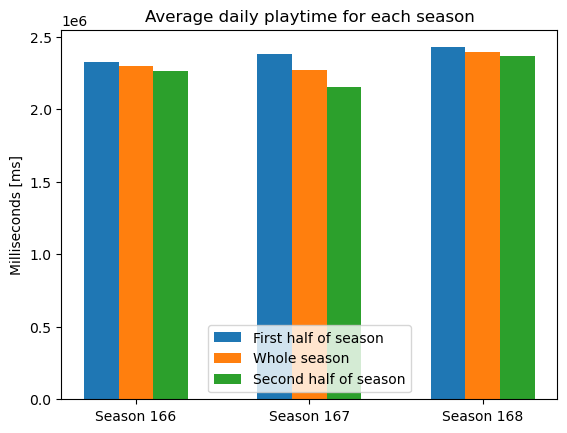

In [95]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [df1_seasons[0]['playtime_daily'][df1_seasons[0]['season_day'] <= 14].mean(), df1_seasons[1]['playtime_daily'][df1_seasons[1]['season_day'] <= 14].mean(), df1_seasons[2]['playtime_daily'][df1_seasons[2]['season_day'] <= 14].mean()]
Y2 = [df1_seasons[0]['playtime_daily'].mean(), df1_seasons[1]['playtime_daily'].mean(), df1_seasons[2]['playtime_daily'].mean()]
Y3 = [df1_seasons[0]['playtime_daily'][df1_seasons[0]['season_day'] > 14].mean(), df1_seasons[1]['playtime_daily'][df1_seasons[1]['season_day'] > 14].mean(), df1_seasons[2]['playtime_daily'][df1_seasons[2]['season_day'] > 14].mean()]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y1, label = 'First half of season', width = 0.2)
plt.bar(X_axis , Y2, label = 'Whole season', width = 0.2)
plt.bar(X_axis + 0.2, Y3, label = 'Second half of season', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Milliseconds [ms]")
plt.title("Average daily playtime for each season")
plt.legend()
plt.show()

We can see that for each season, in the first half of the season managers are playing the game more but in season 168 average daily playtime is the highest among all seasons even if there is less net revenue from ads and less watched ads.

Let's see how much net revenue managers who are a lifetime payers and are not watching ads make through iap and compare that to managers who are not lifetime payers but watch video ads.

In [96]:
df1['net_revenue_usd_iap_daily'][df1['is_payer_lifetime'] == True & ~df1['global_user_id'].isin(df2['global_user_id'])].sum()

738.5424244557674

In [97]:
df2['net_revenue'][df2['global_user_id'].isin(df1['global_user_id']) & df1['is_payer_lifetime'] == False].sum()

671.6537972759996

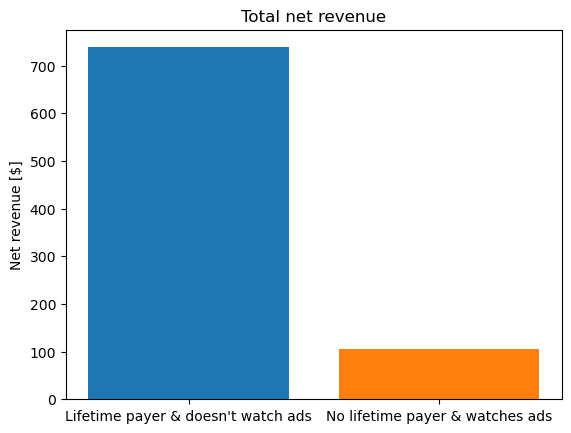

In [98]:
y = np.array([df1['net_revenue_usd_iap_daily'][(df1['is_payer_lifetime'] == True) & (~df1['global_user_id'].isin(df2['global_user_id']))].sum(), df2['net_revenue'][(df2['global_user_id'].isin(df1['global_user_id'])) & (df1['is_payer_lifetime'] == False)].sum()])
mylabels = ["Lifetime payer & doesn't watch ads", "No lifetime payer & watches ads"]

plt.bar(mylabels, y, color = colors)
plt.ylabel("Net revenue [$]")
plt.title("Total net revenue")
plt.show()

Let's see how many VALE ads were watched during each season and during two different events:

<h1>Season 166</h1>

We know that there are two VALE events within each season, the first one lasts for 5 days and the second one for 4 days.

First event:

In [99]:
print("During the first event in season 166, VALE ads bring net revenue for about", df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[:5])].sum())
print("During the first event in season 166, number of watched VALE ads is", len(df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[:5])]))

During the first event in season 166, VALE ads bring net revenue for about 14.495454
During the first event in season 166, number of watched VALE ads is 14596


Second event:

In [100]:
print("During the second event in season 166, VALE ads bring net revenue for about", df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[5:])].sum())
print("During the second event in season 166, number of watched VALE ads is", len(df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[5:])]))

During the second event in season 166, VALE ads bring net revenue for about 8.665416
During the second event in season 166, number of watched VALE ads is 8320


<h1>Season 167</h1>

First event:

In [101]:
print("During the first event in season 167, VALE ads bring net revenue for about", df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[:5])].sum())
print("During the first event in season 167, number of watched VALE ads is", len(df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[:5])]))

During the first event in season 167, VALE ads bring net revenue for about 13.157841
During the first event in season 167, number of watched VALE ads is 13655


Second event:

In [102]:
print("During the second event in season 167, VALE ads bring net revenue for about", df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[5:])].sum())
print("During the second event in season 167, number of watched VALE ads is", len(df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[5:])]))

During the second event in season 167, VALE ads bring net revenue for about 8.145419
During the second event in season 167, number of watched VALE ads is 8497


<h1>Season 168</h1>

First event:

In [103]:
print("During the first event in season 168, VALE ads bring net revenue for about", df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[:5])].sum())
print("During the first event in season 168, number of watched VALE ads is", len(df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[:5])]))

During the first event in season 168, VALE ads bring net revenue for about 12.936256
During the first event in season 168, number of watched VALE ads is 13353


Second event:

In [104]:
print("During the second event in season 168, VALE ads bring net revenue for about", df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[5:])].sum())
print("During the second event in season 168, number of watched VALE ads is", len(df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[5:])]))

During the second event in season 168, VALE ads bring net revenue for about 8.312234
During the second event in season 168, number of watched VALE ads is 8740


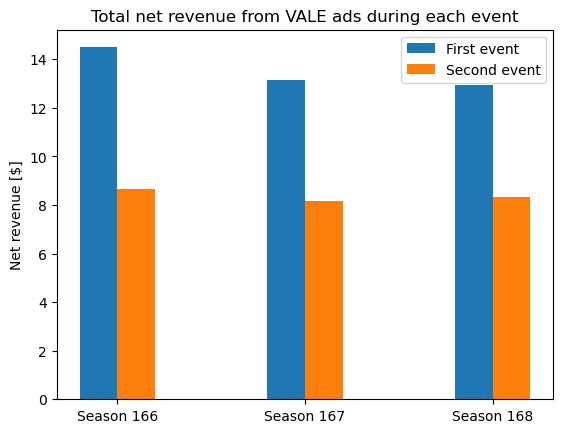

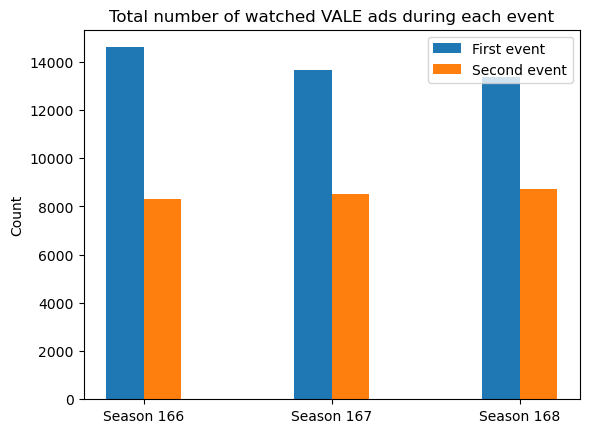

In [105]:
X = ['Season 166', 'Season 167', 'Season 168']
Y1 = [df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[:5])].sum(), df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[:5])].sum(), df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[:5])].sum()]
Y2 = [df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[5:])].sum(), df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[5:])].sum(), df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[5:])].sum()]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, Y1, label = 'First event', width = 0.2)
plt.bar(X_axis + 0.1, Y2, label = 'Second event', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Net revenue [$]")
plt.title("Total net revenue from VALE ads during each event")
plt.legend()
plt.show()


Y1 = [len(df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[:5])]), len(df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[:5])]), len(df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[:5])])]
Y2 = [len(df2_VALE_ads_season1['net_revenue'][df2_VALE_ads_season1['date'].isin(dates_VALE_active_season1[5:])]), len(df2_VALE_ads_season2['net_revenue'][df2_VALE_ads_season2['date'].isin(dates_VALE_active_season2[5:])]), len(df2_VALE_ads_season3['net_revenue'][df2_VALE_ads_season3['date'].isin(dates_VALE_active_season3[5:])])]

plt.bar(X_axis - 0.1, Y1, label = 'First event', width = 0.2)
plt.bar(X_axis + 0.1, Y2, label = 'Second event', width = 0.2)

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Total number of watched VALE ads during each event")
plt.legend()
plt.show()